<center>
    <h1><b>FraudGuard: Unmasking Transactional Deception</b></h1>


![FraudGuard: Unmasking Transactional Deception](FraudGuard_banner_image.jpg)
</center>

# Executive Summary
- **Introduction:**
  - This project, FraudGuard: Unmasking Transactional Deception, leverages the IEEE-CIS Fraud Detection dataset to develop models that identify and prevent fraudulent credit card transactions, particularly focusing on Card-Not-Present (CNP) fraud.
  - The goal is to build predictive models that estimate the likelihood of fraud in real-time, aiding financial institutions in combating fraudulent activities.
- **Exploratory Data Analysis (EDA):**
  - The dataset contains over 144,000 observations and 434 features, with missing data imputed and categorical variables encoded for model readiness.
  - An effective preprocessing strategy, including scaling and imputation, ensures the dataset is well-prepared for machine learning models.
- **Model Development:**
  - Boosted Decision Stumps: Achieved high accuracy (95.1%) with balanced precision and recall, but struggled with more complex patterns.
  - Boosted Logistic Regression: Showed slightly lower accuracy (94.3%) and weaker precision and recall performance.
  - Stacked Model: Combining KNN, Decision Tree, Logistic Regression, and XGBoost, this model achieved the best balance of accuracy (96.64%), precision (86.76%), and recall, making it the strongest performer.
  - Feedforward Neural Network (FNN): Performed well (96.31% accuracy) but suffered from overfitting and lower recall.
- **Conclusion:**
  - Stacking Model 1 is the best overall model due to its superior generalization and balanced performance across key metrics.
  - While further model optimization is possible, it is not planned within the current project scope. However, future work could explore this to fully leverage the model's potential.
  - Final model performance on external data will be evaluated at the end of September, though current analysis shows no statistically significant performance differences between models.

![FraudGuard: Unmasking Transactional Deception](/Users/james_smith/Library/Mobile Documents/com~apple~CloudDocs/James/Data/AUT:IOD/Course Work/Mini Project 3/Security Project/Data/Fraud Data/FraudGuard_banner_image.jpg)

# Introduction

In the rapidly evolving landscape of digital finance, the detection and prevention of fraudulent transactions have become critical challenges for institutions worldwide. As financial systems grow more complex, so too do the methods employed by fraudsters, necessitating innovative approaches to safeguard assets and maintain trust. This project, titled **FraudGuard: Unmasking Transactional Deception**, seeks to address these challenges by leveraging the IEEE-CIS Fraud Detection dataset to enhance the identification and prevention of fraudulent activities within transaction data.

The IEEE-CIS Fraud Detection dataset pertains to online payment fraud, with a specific emphasis on credit card transactions. Developed in collaboration between IEEE and the Consumer Internet Services (CIS) industry, the dataset is designed to identify fraudulent activities within online payment systems. The dataset primarily addresses Card-Not-Present (CNP) fraud, a form of fraud that occurs when transactions are executed without the physical presentation of the card, typically in online or telephonic payment scenarios.

The core objective of this project is to uncover the underlying patterns and factors that contribute to fraudulent transactions. By analysing the dataset, we aim to develop predictive models capable of estimating the likelihood of fraud in real-time, thus providing a robust tool for financial institutions to pre-empt and counteract fraudulent behaviours. Additionally, this project will explore temporal trends and patterns within the data, offering insights into how fraudulent activities evolve over time and how they differ from legitimate transactions.

Through a comprehensive evaluation of various classification models, we will assess their accuracy and efficacy in distinguishing between fraudulent and non-fraudulent transactions. The findings from this project will not only contribute to a deeper understanding of fraud detection mechanisms but also offer practical solutions to improve the security and reliability of financial systems.

## Import Relevant Libraries and Packages

In [125]:
# Data Manipulation and Visualisation
import pandas as pd  # Essential for data manipulation, creating and operating on DataFrames
import numpy as np  # Support for large, multi-dimensional arrays and matrices, along with mathematical functions

# Visualisation
import matplotlib.pyplot as plt  # Core library for creating static visualizations in Python
import seaborn as sns  # Statistical data visualization built on top of matplotlib
import plotly.express as px  # High-level interface for creating interactive plots, ideal for dashboards and web-based data exploration

# Exploratory Data Analysis (EDA)
# Automated EDA Tools
import sweetviz as sv  # Automatically generates visualizations and detailed EDA reports with a single line of code
from dataprep.eda import create_report  # Automates the creation of comprehensive EDA reports, including missing values, correlations, and distributions

# Statistical Analysis
from scipy.stats import skew, kurtosis, shapiro, norm  # Functions for skewness, kurtosis, normality tests (Shapiro-Wilk), and normal distribution
from scipy.stats import ttest_rel, wilcoxon # For significance testing

# Data Preprocessing
# Label Encoding and Scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler  # Encode categorical variables and standardize features

# Missing Data Imputation
from sklearn.experimental import enable_iterative_imputer  # Enables the experimental Iterative Imputer in Scikit-learn
from sklearn.impute import IterativeImputer, SimpleImputer  # Imputation techniques for missing data

# Data Splitting and Pipelines
from sklearn.model_selection import train_test_split  # Split data into training and testing sets
from sklearn.compose import ColumnTransformer  # Apply different preprocessing to different columns in a DataFrame
from sklearn.pipeline import Pipeline  # Sequentially apply a list of transforms and a final estimator

# Machine Learning Algorithms
# Ensemble Methods and Decision Trees
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier  # AdaBoost and stacking classifiers
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier

# Other Classifiers
from sklearn.linear_model import LogisticRegression  # Logistic regression model for binary classification
from sklearn.neighbors import KNeighborsClassifier  # K-nearest neighbors algorithm for classification
import xgboost as xgb  # Extreme Gradient Boosting, a highly efficient and scalable implementation of gradient boosting

# Model Evaluations and Metrics
# Evaluation Metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, log_loss, confusion_matrix, classification_report)  # Various metrics for evaluating classification models

# ROC and Precision-Recall Curves
from sklearn.metrics import roc_curve, precision_recall_curve, auc  # Calculate and plot ROC and Precision-Recall curves

# Learning Curves
from sklearn.model_selection import learning_curve  # Visualize the training and validation score as a function of the training set size

# Label Binarization
from sklearn.preprocessing import label_binarize  # Convert labels into binary format for multi-class metrics

# Deep Learning Models
# TensorFlow and Keras
import tensorflow as tf  # TensorFlow library for deep learning
from tensorflow.keras.models import Sequential  # Sequential model in Keras
from tensorflow.keras.layers import Input, Dense, Dropout  # Keras layers for building neural networks
from tensorflow.keras.optimizers import Adam  # Adam optimizer for training deep learning models
from tensorflow.keras.losses import BinaryCrossentropy  # Binary cross-entropy loss for binary classification
from tensorflow.keras.callbacks import EarlyStopping  # Early stopping to prevent overfitting during training

# The Data

The IEEE-CIS Fraud Detection dataset, provided by the IEEE Computational Intelligence Society (IEEE-CIS) and hosted on Kaggle, is specifically designed to identify and predict fraudulent transactions. Released in October 2019, this dataset is crucial for developing and validating fraud detection models. It comprises two main files: one for identity data and another for transactions, both of which are linked by the TransactionID. It is important to note that not all transactions have corresponding identity information.

The initial step in working with the IEEE-CIS Fraud Detection dataset involves loading the data files, specifically train_transaction.csv, train_identity.csv, test_transaction.csv, and test_identity.csv. These files, containing transaction and identity data, must be merged based on the TransactionID. Note that some transactions may lack associated identity details. Following the data loading, basic data cleaning will be performed to prepare the dataset for in-depth analysis.

**Reference:**

IEEE Computational Intelligence Society. (2019). IEEE-CIS fraud detection dataset. Kaggle. https://www.kaggle.com/c/ieee-fraud-detection/data

- ieee-fraud-detection,
  - author = {Addison Howard, Bernadette Bouchon-Meunier, IEEE CIS, inversion, John Lei, Lynn@Vesta, Marcus2010, Prof. Hussein Abbass},
  - title = {IEEE-CIS Fraud Detection},
  - publisher = {Kaggle},
  - year = {2019},
  - url = {https://kaggle.com/competitions/ieee-fraud-detection}


#### Training Data

In [2]:
identity_train = pd.read_csv('/Users/james_smith/Library/Mobile Documents/com~apple~CloudDocs/James/Data/AUT:IOD/Course Work/Mini Project 3/Security Project/Data/Fraud Data/ieee-fraud-detection/train_identity.csv')
transactions_train = pd.read_csv('/Users/james_smith/Library/Mobile Documents/com~apple~CloudDocs/James/Data/AUT:IOD/Course Work/Mini Project 3/Security Project/Data/Fraud Data/ieee-fraud-detection/train_transaction.csv')

#### Testing Data

In [104]:
identity_test = pd.read_csv('/Users/james_smith/Library/Mobile Documents/com~apple~CloudDocs/James/Data/AUT:IOD/Course Work/Mini Project 3/Security Project/Data/Fraud Data/ieee-fraud-detection/test_identity.csv')
transactions_test = pd.read_csv('/Users/james_smith/Library/Mobile Documents/com~apple~CloudDocs/James/Data/AUT:IOD/Course Work/Mini Project 3/Security Project/Data/Fraud Data/ieee-fraud-detection/test_transaction.csv')

### **Variable Dictionary**

#### **Categorical Features - Transaction**
- **ProductCD**: Product code associated with the transaction.
- **card1 - card6**: Various attributes related to the credit card, including card type, category, issuing bank, and country.
- **addr1, addr2**: Address information, likely representing the billing region and city.
- **P_emaildomain**: Email domain of the purchaser.
- **R_emaildomain**: Email domain of the recipient.
- **M1 - M9**: Flags or binary indicators representing categorical attributes or matches.

#### **Categorical Features - Identity**
- **DeviceType**: Type of device used for the transaction (e.g., mobile, desktop).
- **DeviceInfo**: Specific details about the device (e.g., model, make).
- **id_12 - id_38**: Various identity features related to device characteristics, user behaviour, or account information.

#### **Numeric Features Summary**
- **Transactions DataFrames**:
  - **Float64 Variables**: Predominantly represent continuous values or measurements related to transactions.
  - **Int64 Variables**: Represent discrete quantities or counts.
  - **Data Size**: 
    - `transactions_train` contains 590,540 entries and 376 numeric features.
    - `transactions_test` contains 506,691 entries and 376 numeric features.
  
- **Identity DataFrames**:
  - **Float64 Variables**: Primarily continuous data such as user activity metrics or device attributes.
  - **Int64 Variables**: Limited to one column, likely representing unique identifiers or counts.
  - **Data Size**: 
    - `identity_train` includes 144,233 entries and 23 numeric features.
    - `identity_test` includes 141,907 entries and 23 numeric features.

#### **Additional Note**
- **TransactionDT**: Represents the time delta since a reference point, used to track the elapsed time between transactions, not an actual timestamp.

In [4]:
# List of DataFrames to compare
dataframes_to_compare = [identity_train, identity_test, transactions_train, transactions_test]

# Define the target column for the transactions datasets
target_column_train = 'isFraud' 

# Feature columns for transactions_train
feature_columns_train = transactions_train.columns.difference([target_column_train])
print("DataFrame: transactions_train")
print(f"Target: {target_column_train}")
print("Features:")
print(feature_columns_train.tolist())

print("\n" + "-"*150 + "\n")

# Feature columns for transactions_test
feature_columns_test = transactions_test.columns
print("DataFrame: transactions_test")
print("Features:")
print(feature_columns_test.tolist())

print("\n" + "-"*150 + "\n")

# Compare feature columns for transactions_train and transactions_test
diff_train_test = feature_columns_train.symmetric_difference(feature_columns_test)
if not diff_train_test.empty:
    print("Differences between train and test feature columns for transactions:")
    print(diff_train_test.tolist())
else:
    print("Feature columns for transactions_train and transactions_test match.")

print("\n" + "-"*150 + "\n")

# Feature columns for identity_train
feature_columns_identity_train = identity_train.columns
print("DataFrame: identity_train")
print("Features:")
print(feature_columns_identity_train.tolist())

print("\n" + "-"*150 + "\n")

# Feature columns for identity_test
feature_columns_identity_test = identity_test.columns
print("DataFrame: identity_test")
print("Features:")
print(feature_columns_identity_test.tolist())

print("\n" + "-"*150 + "\n")

# Compare feature columns for identity_train and identity_test
diff_identity_train_test = feature_columns_identity_train.symmetric_difference(feature_columns_identity_test)
if not diff_identity_train_test.empty:
    print("Differences between train and test feature columns for identity:")
    print(diff_identity_train_test.tolist())
else:
    print("Feature columns for identity_train and identity_test match.")

DataFrame: transactions_train
Target: isFraud
Features:
['C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'D1', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'P_emaildomain', 'ProductCD', 'R_emaildomain', 'TransactionAmt', 'TransactionDT', 'TransactionID', 'V1', 'V10', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V11', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V12', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V13', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V14', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V15', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V16', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168'

The analysis revealed that the feature sets for transactions_train and transactions_test were perfectly aligned, ensuring consistency in model training and evaluation processes. However, discrepancies were identified between the feature columns of identity_train and identity_test. Specifically, the features in identity_train utilised an underscore (e.g., id_01, id_02, id_03), whereas the corresponding features in identity_test employed a dash (e.g., id-01, id-02, id-03). The primary distinction between the two datasets, therefore, was the use of different delimiters in the column names.

In [105]:
# Rename columns in identity_test to match identity_train
identity_test.columns = [col.replace('-', '_') for col in identity_test.columns]


In [106]:
# Merge datasets
df_train = pd.merge(identity_train, transactions_train, on='TransactionID', how='left') # Merge on TransactionID
df_test = pd.merge(identity_test, transactions_test, on='TransactionID', how='left') # Merge on TransactionID


In [7]:
# Set display options
pd.set_option('display.expand_frame_repr', False)  # Avoid truncating dataframe
pd.set_option('display.max_rows', None)            # Display all rows
pd.set_option('display.max_columns', None)         # Display all columns

# Visualise data import for train datasets
print(df_train.head())
print('\n' + '-'*500 + '\n')  # Add a separator for readability

# Visualise data import for test datasets
print(df_test.head())


   TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  id_09  id_10  id_11     id_12  id_13  id_14  id_15     id_16  id_17  id_18  id_19  id_20  id_21  id_22 id_23  id_24  id_25  id_26 id_27  id_28     id_29             id_30                id_31  id_32      id_33           id_34 id_35 id_36 id_37 id_38 DeviceType                     DeviceInfo  isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  C13  C14   D1   D2   D3   D4   D5   D6   D7    D8   D9  D10  D11  D12  D13  D14  D15   M1   M2   M3   M4   M5   M6   M7   M8   M9  V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59

In [8]:
# Inspect DataFrame information for training datasets
print(df_train.info())
print('\n' + '-'*250 + '\n')  # Add a separator for readability
print(df_test.info())
print('\n' + '-'*250 + '\n')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 144233 entries, 0 to 144232
Columns: 434 entries, TransactionID to V339
dtypes: float64(399), int64(4), object(31)
memory usage: 478.7+ MB
None

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141907 entries, 0 to 141906
Columns: 433 entries, TransactionID to V339
dtypes: float64(399), int64(3), object(31)
memory usage: 469.9+ MB
None

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



The first DataFrame (df_train) contains 144,233 entries with 434 columns, including 399 float64, 4 int64, and 31 object types, consuming approximately 478.7 MB of memory. The second DataFrame has 141,907 entries with 433 columns, including 399 float64, 3 int64, and 31 object types, with a memory usage of approximately 469.9 MB. The key difference is that the first DataFrame has one additional column and one more int64 column, resulting in slightly higher memory usage.

# Step 4: Exploration and Cleaning of Data

The exploratory data analysis (EDA) phase is integral to understanding the dataset and preparing it for subsequent analysis. Initially, the number of features within the dataset was determined using the shape of the DataFrame, which provided the total count of variables. To identify the data types of each variable, the .dtypes attribute was employed, which categorised each variable as either numerical or categorical. Further analysis involved assessing the domains and intervals of the variables. This was achieved through summary statistics generated by the .describe() method, which provided insights into the range and distribution of values for each variable.

The presence of null values was examined to evaluate their significance and impact on the dataset. This involved identifying and quantifying missing values to understand their distribution and potential influence on the analysis. Missing values and instances of improper coding were addressed by employing suitable imputation techniques, ensuring that the dataset was adequately prepared for modelling. Additionally, coded content within the dataset was analysed. This involved scrutinising any numerical encodings or placeholders used in the data to ensure that they were correctly interpreted and mapped.

To maintain the integrity of the validation process, EDA was conducted solely on the training data, thereby preventing data leakage and ensuring an unbiased evaluation of model performance. The test data remained unaltered until the final assessment phase.

In [9]:
# Display basic information about df_train
print(f"DataFrame: df_train (Shape: {df_train.shape}):")
print(f"Number of observations (rows): {df_train.shape[0]}")
print(f"Number of features (columns): {df_train.shape[1]}")

DataFrame: df_train (Shape: (144233, 434)):
Number of observations (rows): 144233
Number of features (columns): 434


The dataset df_train comprises 144,233 observations (rows) and 434 features (columns). This extensive dataset provides a broad foundation for analysis, with a large number of features available for modelling and exploration.

In [10]:
print(df_train.dtypes)

TransactionID       int64
id_01             float64
id_02             float64
id_03             float64
id_04             float64
id_05             float64
id_06             float64
id_07             float64
id_08             float64
id_09             float64
id_10             float64
id_11             float64
id_12              object
id_13             float64
id_14             float64
id_15              object
id_16              object
id_17             float64
id_18             float64
id_19             float64
id_20             float64
id_21             float64
id_22             float64
id_23              object
id_24             float64
id_25             float64
id_26             float64
id_27              object
id_28              object
id_29              object
id_30              object
id_31              object
id_32             float64
id_33              object
id_34              object
id_35              object
id_36              object
id_37              object
id_38       

The dataset structure for the transactions includes a comprehensive set of features comprising numerical and categorical data types. It contains a mix of int64, float64, and object (categorical) columns. 

Specifically within the training data there is,

- TransactionID: A unique identifier for each transaction.
- id_01 to id_11: Mostly numerical features (float64), except for id_12, id_15, and id_16, which are categorical (object).
- DeviceType and DeviceInfo: Categorical features describing the device used.
- isFraud: A binary target variable (int64) indicating fraudulent transactions.
- TransactionDT and TransactionAmt: Timestamp and amount of the transaction, both numerical.
- ProductCD, card1 to card6, addr1, addr2: Categorical and numerical features related to the product and payment cards.
- P_emaildomain and R_emaildomain: Categorical features indicating the email domains associated with the transaction.
- C1 to C14, D1 to D15: Numerical features of varying significance.
- M1 to M9: Categorical features indicating various match statuses.
- V1 to V339: Numerical features representing anonymized variables derived from transactions.

Overall, the dataset features a large number of variables, primarily numerical, which likely include derived and encoded features to capture complex patterns within the transactions. The presence of numerous categorical variables suggests that preprocessing steps, such as encoding, will be crucial for model development. The dataset structure appears consistent and suitable for machine learning tasks, particularly for fraud detection modelling.

To ensure the integrity and consistency of the data within the object type columns, it is essential to systematically review these columns for any potential coded data errors or anomalies. This review will involve examining the unique values present in each object column to identify any inconsistencies, unexpected entries, or illogical values. Such an analysis will help ensure that the data is accurate and reliable, thereby supporting robust and meaningful analysis in subsequent stages of the project.

In [11]:
# Display unique values for each object column in df_train
for column in df_train.select_dtypes(include=['object']).columns:
    unique_values = df_train[column].unique()
    print(f"Unique values for {column}:")
    print(unique_values)
    print("\n" + "-"*50 + "\n")

Unique values for id_12:
['NotFound' 'Found']

--------------------------------------------------

Unique values for id_15:
['New' 'Found' nan 'Unknown']

--------------------------------------------------

Unique values for id_16:
['NotFound' 'Found' nan]

--------------------------------------------------

Unique values for id_23:
[nan 'IP_PROXY:TRANSPARENT' 'IP_PROXY:ANONYMOUS' 'IP_PROXY:HIDDEN']

--------------------------------------------------

Unique values for id_27:
[nan 'Found' 'NotFound']

--------------------------------------------------

Unique values for id_28:
['New' 'Found' nan]

--------------------------------------------------

Unique values for id_29:
['NotFound' 'Found' nan]

--------------------------------------------------

Unique values for id_30:
['Android 7.0' 'iOS 11.1.2' nan 'Mac OS X 10_11_6' 'Windows 10' 'Android'
 'Linux' 'iOS 11.0.3' 'Mac OS X 10_7_5' 'Mac OS X 10_12_6'
 'Mac OS X 10_13_1' 'iOS 11.1.0' 'Mac OS X 10_9_5' 'Windows 7'
 'Windows 8.1' 'Mac

The output displays the unique values for several columns in the dataset, providing insights into the variety and distribution of categorical data. For most columns, the unique values are limited to a few specific entries or include a considerable number of NaN values, suggesting that many records may be missing data in these fields.

In general, ID-related columns (such as id_12, id_15, id_16, id_23, etc.) predominantly feature values like ‘Found’, ‘NotFound’, ‘New’, ‘Unknown’, or variations thereof, with a few NaN entries. Device and system-related columns (including id_30, id_31, id_33, DeviceType, and DeviceInfo) display a diverse array of values, encompassing numerous operating systems, browser types, and screen resolutions, reflecting the broad range of devices and software used. Financial and email columns (ProductCD, card4, card6, P_emaildomain, and R_emaildomain) contain standard options such as credit card types and common email domains, alongside some NaN values. The M columns (from M1 to M9) are largely empty, with NaN values being predominant.

Additionally, an erroneous value ‘func’ was identified in the id_30 column, indicating a potential data entry or processing error.

In [12]:
# Filter the DataFrame to find rows with 'func' in 'id_30'
erroneous_rows = df_train[df_train['id_30'] == 'func']
# Display the rows with the erroneous 'func' value
print(erroneous_rows)

       TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  id_09  id_10  id_11     id_12  id_13  id_14  id_15     id_16  id_17  id_18  id_19  id_20  id_21  id_22               id_23  id_24  id_25  id_26  id_27  id_28     id_29 id_30                    id_31  id_32      id_33           id_34 id_35 id_36 id_37 id_38 DeviceType             DeviceInfo  isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  C13  C14   D1  D2  D3   D4  D5   D6  D7          D8        D9  D10  D11  D12  D13  D14  D15   M1   M2   M3   M4   M5   M6   M7   M8   M9  V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57

The values of id_30 appear to represent the operating system of the device used in the observation. The recognised operating systems include various versions of Android, iOS, Mac OS X, and Windows. However, entries labelled as “func” and “other” do not clearly align with standard operating system categories. Therefore, we will update the value “func” to “other” for consistency in our data.

In [13]:
# Update `id_30` column in the erroneous rows
df_train.loc[df_train['id_30'] == 'func', 'id_30'] = 'other'

# Print the updated erroneous rows to confirm
print(df_train.iloc[[4470, 7307, 9653, 30794, 32896, 46418, 47348, 49797, 50834, 57729]][['id_30']])


       id_30
4470   other
7307   other
9653   other
30794  other
32896  other
46418  other
47348  other
49797  other
50834  other
57729  other


In [14]:
# Check for null values in each column
nulls = df_train.isnull().sum()

# Filter columns with null values
null_columns = nulls[nulls > 0]

if not null_columns.empty:
    print("Columns with null values and their data types:")
    for col in null_columns.index:
        print(f"Column: {col}, Data Type: {df_train[col].dtype}, Null Values: {null_columns[col]}")
else:
    print("No null values found.")

print("\n" + "-"*50 + "\n")


Columns with null values and their data types:
Column: id_02, Data Type: float64, Null Values: 3361
Column: id_03, Data Type: float64, Null Values: 77909
Column: id_04, Data Type: float64, Null Values: 77909
Column: id_05, Data Type: float64, Null Values: 7368
Column: id_06, Data Type: float64, Null Values: 7368
Column: id_07, Data Type: float64, Null Values: 139078
Column: id_08, Data Type: float64, Null Values: 139078
Column: id_09, Data Type: float64, Null Values: 69307
Column: id_10, Data Type: float64, Null Values: 69307
Column: id_11, Data Type: float64, Null Values: 3255
Column: id_13, Data Type: float64, Null Values: 16913
Column: id_14, Data Type: float64, Null Values: 64189
Column: id_15, Data Type: object, Null Values: 3248
Column: id_16, Data Type: object, Null Values: 14893
Column: id_17, Data Type: float64, Null Values: 4864
Column: id_18, Data Type: float64, Null Values: 99120
Column: id_19, Data Type: float64, Null Values: 4915
Column: id_20, Data Type: float64, Null Va

The df_train DataFrame has a shape of (144,233, 434). Several columns contain null values, with the counts and data types varying across different features. Notable columns with significant numbers of null values include id_03, id_04, id_07, id_08, dist1, and others, with some features such as dist1, D11, and various V and M columns having missing values across the entire dataset. The presence of both float64 and object data types among these columns underscores the importance of careful handling of missing data in the preprocessing stage.

In [15]:
# Identify columns with 100% null values
all_null_columns = [col for col in null_columns.index if df_train[col].isnull().all()]

# Print the columns with 100% null values
print("Columns with 100% null values:")
print(all_null_columns)


Columns with 100% null values:
['dist1', 'D11', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']


During the process of checking for null values, it was observed that some columns contained 100% missing data. However, to ensure the usability and consistency of the model, it was crucial to maintain the structure of the DataFrame. This decision was based on the possibility that the test data or future datasets used with this model might contain valid values in these columns. Therefore, instead of dropping these columns, they were imputed with a value of 0 to preserve the DataFrame's structure and ensure that the model can handle any future data with similar characteristics.

In [16]:
# Impute these columns with 0
df_train[all_null_columns] = df_train[all_null_columns].fillna(0)


In [17]:
# Re-check null values to confirm imputation
updated_nulls = df_train.isnull().sum()
print("Updated null values:")
print(updated_nulls[updated_nulls > 0])

Updated null values:
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
card2               902
card3               172
card4              

In handling missing data within the dataset, a tailored approach was initially employed to ensure appropriate imputation based on the nature of the variables. Numeric variables (float64) were imputed using the Iterative Imputer (MICE) to preserve the relationships between features. Specific categorical variables, such as DeviceType, DeviceInfo, and email domains, were imputed with the category 'Unknown' to account for potentially meaningful missing information. For the remaining categorical variables (object), label encoding was applied, followed by imputation using the most frequent value. However, during the implementation, significant convergence issues arose with MICE, resulting in unstable imputation outcomes and an excessively long computational time. Consequently, it was decided to adopt a simpler mean imputation strategy for numeric variables. This approach not only achieved good metrics but was also computationally less intensive, offering a more stable and efficient solution while maintaining the integrity and predictive power of the dataset. By reverting to mean imputation, the process became more manageable, ensuring consistent and reliable handling of missing data across the dataset.

In [18]:
# List of numeric columns for imputation (float64)
numeric_cols = [
    'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11',
    'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25',
    'id_26', 'id_32', 'addr1', 'addr2', 'dist2',
    'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D12', 'D13', 'D14', 'D15',
    'card2', 'card3', 'card5'] + [f'V{i}' for i in range(12, 340) if f'V{i}' not in ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']]

# Initialize the Iterative Imputer
#imputer = IterativeImputer(max_iter=10, random_state=0, verbose=2)

# Impute missing values in the remaining numeric columns
#df_train[numeric_cols] = imputer.fit_transform(df_train[numeric_cols])

# Output the first few rows of the imputed DataFrame
#print(df_train[numeric_cols].head())

In [19]:
# Initialize the Simple Imputer with mean strategy
mean_imputer = SimpleImputer(strategy='mean')

# Impute missing values in the numeric columns with the mean
df_train[numeric_cols] = mean_imputer.fit_transform(df_train[numeric_cols])


In [20]:
# Impute Specific Categorical Variables with 'Unknown'
categorical_with_unknown = ['DeviceType', 'DeviceInfo', 'P_emaildomain', 'R_emaildomain']
df_train[categorical_with_unknown] = df_train[categorical_with_unknown].fillna('Unknown')

# Label Encoding with Imputation for Remaining Categorical Variables (object)
remaining_categorical_cols = [
    'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 
    'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'card4', 'card6'
] + [f'M{i}' for i in range(1, 10)]  # Including M1 to M9

# Initialize Label Encoder
le = LabelEncoder()

# Apply Label Encoding and Mode Imputation
for col in remaining_categorical_cols:
    # Ensure the column exists in df_train
    if col in df_train.columns:
        # Label encode the categorical variable
        df_train[col] = le.fit_transform(df_train[col].astype(str))
        
        # Impute missing values with the mode of the column
        df_train[col].fillna(df_train[col].mode()[0], inplace=True)

# Display the first few rows of the processed DataFrame
df_train.head()


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004,0.0,70787.0,0.060189,-0.058938,1.615585,-6.69871,13.285354,-38.600388,0.091023,-0.301124,100.0,NotFound,48.053071,-480.000000,1,1,166.0,14.237337,542.0,144.0,368.26982,16.002708,3,12.800927,329.608924,149.070308,2,1,1,7,124,32.000000,164,3,1,0,1,1,mobile,SAMSUNG SM-G892A Build/NRD90M,0,86506,50.000,H,4497,514.0,150.0,2,102.0,1,420.000000,87.000000,0.0,231.945575,gmail.com,Unknown,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,123.092685,34.339241,60.953449,46.471081,70.927924,41.297593,146.058108,0.561057,23.168795,0.0,53.612962,17.897168,57.727033,54.710189,0,0,0,3,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996328,0.827482,0.832873,0.994131,1.003513,0.91103,0.917116,0.961912,0.980732,1.074891,1.083679,0.96817,0.97508,0.005739,0.006143,0.0,0.0,0.964036,0.973418,0.82738,0.832729,0.0,0.0,1.48067,1.666523,1.063403,1.134018,0.995505,1.000108,1.082091,1.297089,1.374361,1.050954,1.091976,0.0,0.0,0.983937,0.957402,0.996556,0.0,0.0,1.291348,1.470904,0.884899,0.91503,1.00418,1.064499,0.93587,0.966576,0.976871,1.059256,0.997445,0.991744,1.026999,0.004047,0.0,0.0,0.978288,1.011048,0.896892,0.931409,0.0,0.0,1.417528,1.618448,0.915448,1.048619,1.111974,0.974277,1.001377,0.998975,1.090982,1.233191,1.288885,0.994727,0.006577,0.0,0.0,1.014985,1.04733,0.861014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.00000,18.000000,140.000000,0.000000,0.000000,0.000000,0.000000,1803.00000,49.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15557.990234,169690.796875,0.000000,0.000000,0.00000,515.000000,5155.000000,2840.00000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.

In [21]:
# Create a copy of the DataFrame
df_copy = df_train.copy()

# Step 3: Label Encoding with Imputation for Remaining Categorical Variables (object)
remaining_categorical_cols = [
    'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 
    'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'card4', 'card6'
] + [f'M{i}' for i in range(1, 10)]  # Including M1 to M9

# Initialize Label Encoder
label_encoders = {}
imputed_values = {}

# Apply Label Encoding and Mode Imputation on the copy DataFrame
for col in remaining_categorical_cols:
    if col in df_copy.columns:
        # Label encode the categorical variable
        le = LabelEncoder()
        df_copy[col] = le.fit_transform(df_copy[col].astype(str))
        
        # Store the label encoder to reverse the encoding later
        label_encoders[col] = le
        
        # Impute missing values with the mode of the column on the copy DataFrame
        mode_value = df_copy[col].mode()[0]
        df_copy[col].fillna(mode_value, inplace=True)
        
        # Reverse the label encoding
        df_copy[col] = le.inverse_transform(df_copy[col])
        
        # Store the imputed values
        imputed_values[col] = df_copy[col]

# Impute the original DataFrame with the imputed values
for col, imputed_series in imputed_values.items():
    df_train[col].fillna(imputed_series, inplace=True)

# Display the first few rows of the original DataFrame after imputation
df_train.head()


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004,0.0,70787.0,0.060189,-0.058938,1.615585,-6.69871,13.285354,-38.600388,0.091023,-0.301124,100.0,NotFound,48.053071,-480.000000,1,1,166.0,14.237337,542.0,144.0,368.26982,16.002708,3,12.800927,329.608924,149.070308,2,1,1,7,124,32.000000,164,3,1,0,1,1,mobile,SAMSUNG SM-G892A Build/NRD90M,0,86506,50.000,H,4497,514.0,150.0,2,102.0,1,420.000000,87.000000,0.0,231.945575,gmail.com,Unknown,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,123.092685,34.339241,60.953449,46.471081,70.927924,41.297593,146.058108,0.561057,23.168795,0.0,53.612962,17.897168,57.727033,54.710189,0,0,0,3,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996328,0.827482,0.832873,0.994131,1.003513,0.91103,0.917116,0.961912,0.980732,1.074891,1.083679,0.96817,0.97508,0.005739,0.006143,0.0,0.0,0.964036,0.973418,0.82738,0.832729,0.0,0.0,1.48067,1.666523,1.063403,1.134018,0.995505,1.000108,1.082091,1.297089,1.374361,1.050954,1.091976,0.0,0.0,0.983937,0.957402,0.996556,0.0,0.0,1.291348,1.470904,0.884899,0.91503,1.00418,1.064499,0.93587,0.966576,0.976871,1.059256,0.997445,0.991744,1.026999,0.004047,0.0,0.0,0.978288,1.011048,0.896892,0.931409,0.0,0.0,1.417528,1.618448,0.915448,1.048619,1.111974,0.974277,1.001377,0.998975,1.090982,1.233191,1.288885,0.994727,0.006577,0.0,0.0,1.014985,1.04733,0.861014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.00000,18.000000,140.000000,0.000000,0.000000,0.000000,0.000000,1803.00000,49.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15557.990234,169690.796875,0.000000,0.000000,0.00000,515.000000,5155.000000,2840.00000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.

In [22]:
# Count the number of fraud cases in the training set using the sum method
num_fraud_cases = df_train['isFraud'].sum()

print(f"Number of fraudulent transactions (isFraud = 1): {num_fraud_cases}")


Number of fraudulent transactions (isFraud = 1): 11318


The df_train DataFrame contains 11,318 fraudulent transactions, where the isFraud column is equal to 1.

In [23]:
print(df_train.describe())

       TransactionID          id_01          id_02          id_03          id_04          id_05          id_06          id_07          id_08          id_09          id_10          id_11          id_13          id_14          id_15          id_16          id_17          id_18          id_19          id_20          id_21          id_22          id_23          id_24          id_25          id_26          id_27          id_28          id_29          id_30          id_31          id_32          id_33          id_34          id_35          id_36          id_37          id_38        isFraud  TransactionDT  TransactionAmt          card1          card2          card3          card4          card5          card6          addr1          addr2     dist1          dist2             C1             C2             C3             C4        C5             C6             C7             C8        C9            C10            C11            C12            C13            C14             D1             D2    

In [24]:
# Generate Sweetviz report without pairwise analysis
#sweetviz_report = sv.analyze(df_train, pairwise_analysis='off')
#sweetviz_report.show_html('sweetviz_report.html')

# Save the Sweetviz report to the project folder
#sweetviz_report.show_html('/Users/james_smith/Library/Mobile Documents/com~apple~CloudDocs/James/Data/AUT:IOD/Course Work/Mini Project 3/Security Project/Data/Fraud Data/sweetviz_report.html')

# Summary of EDA findings

## Exploratory Data Analysis Conclusion

The exploratory data analysis (EDA) for the **FraudGuard: Unmasking Transactional Deception** project provides critical insights into the IEEE-CIS Fraud Detection dataset, which is pivotal for enhancing the detection and prevention of fraudulent transactions within online payment systems.

### Dataset Structure and Characteristics

The dataset comprises a substantial number of observations (144,233) and features (434), reflecting the complexity of online payment fraud. The features include both numerical and categorical data, with numerous anonymised variables designed to capture intricate transaction patterns. Key categorical features include device information, email domains, and payment-related attributes, which are essential for identifying fraudulent activity.

### Missing Data and Data Quality Issues

During the EDA, it was identified that certain columns contained 100% missing data. To maintain the integrity and usability of the dataset, these columns were not removed. Instead, they were imputed with a value of 0. This approach was adopted to preserve the DataFrame's structure and to ensure that the model remains robust and adaptable to potential future datasets that may include similar columns with valid values.

Additionally, extensive missing values were observed in several other columns, such as `id_03`, `id_04`, `id_07`, `id_08`, and various `V` and `M` columns. Initially, Iterative Imputer (MICE) was utilised for numeric variables to preserve feature relationships. However, due to convergence issues and computational inefficiencies, a mean imputation strategy was later employed. This revised approach provided a more stable and computationally efficient solution while maintaining the dataset’s predictive power.

### Preprocessing Strategy

Preprocessing involved encoding categorical variables and scaling numerical features, which was crucial for preparing the data for model training. This strategy ensured that the data was well-suited for machine learning applications and that models could leverage the dataset’s features effectively.

### Implications for Model Development

The insights gained from the EDA have informed the subsequent stages of model development. By addressing data quality issues and implementing a robust preprocessing strategy, the project is well-positioned to develop accurate and reliable predictive models for fraud detection. The approach ensures that the models are trained on a well-prepared dataset, capable of handling potential future data with similar characteristics.

In summary, the EDA has provided a comprehensive understanding of the dataset’s structure and quality, guiding the preparation and development of predictive models to enhance the security and reliability of financial systems.

**Disclaimer:** For this project, dimensionality reduction and feature selection techniques were intentionally omitted. The primary objective was to apply and evaluate the deep learning models that were recently covered in class. This approach allowed for an in-depth examination of their capability to manage and leverage the complex relationships present in large, multidimensional datasets. By comparing the performance of these deep learning models with the previously studied ensemble methods, the project aimed to assess the effectiveness of newer techniques in addressing the intricacies of sophisticated data structures.

# Step 5: Modelling

The primary objective of this phase is to address the central research question: “How can the IEEE-CIS Fraud Detection dataset be leveraged to enhance the detection and prevention of fraudulent transactions?” Machine learning modelling is pivotal in this context, as it facilitates the creation of predictive models that classify transactions as fraudulent or non-fraudulent based on observed data patterns.

### Modelling Approach

- **Boosting with Decision Stumps and Logistic Regression:** Boosting, an ensemble technique, sequentially builds models to correct errors from previous ones, making it highly effective for improving predictive accuracy. In this approach, decision stumps (simple decision trees with a single split) and logistic regression are used as base learners. Decision stumps efficiently capture basic patterns while logistic regression provides a robust linear classification capability. This combination allows the model to handle both linear and non-linear relationships within the data, enhancing overall performance by iteratively refining predictions through boosting.
- **Stacking with KNN, Decision Tree, Logistic Regression, and XGBoost:** Stacking is an ensemble method that merges predictions from multiple base models to improve overall performance. Here, K-Nearest Neighbors (KNN) captures local data patterns, Decision Trees manage complex interactions, and Logistic Regression offers a linear perspective. The predictions from these diverse base models are combined using XGBoost, a meta-model known for its efficiency in gradient boosting and its ability to integrate multiple predictive signals. This approach leverages the strengths of each base model and improves classification accuracy by addressing errors made by individual models.
- **Feedforward Neural Network (FNN):** Deep learning models with sigmoid activation functions excel in capturing intricate patterns in high-dimensional data. The sigmoid function outputs probabilities, making it particularly suitable for binary classification tasks such as identifying fraudulent transactions. By learning complex and non-linear relationships between features, deep learning models can handle the complexity of the dataset effectively. The network’s architecture, including the number of layers and neurons, as well as hyperparameters like learning rate, batch size, and epochs, will be tuned to optimise performance and achieve accurate fraud detection.

### Evaluation Strategy

Each model will be assessed for its capability to predict fraudulent transactions using metrics such as accuracy, precision, recall, F1 score, and ROC-AUC. To ensure robust evaluation, the dataset will be split into training and testing subsets using a 70:30 ratio, a common practice that balances training and validation. Additionally, K-Fold Cross-Validation will be employed for a comprehensive assessment of model performance. The inherent class imbalance in the dataset, reflecting the rarity of fraudulent transactions, will be preserved to maintain representativeness and avoid bias. Evaluation metrics will be chosen to effectively handle this imbalance.

**Note:** The dataset is divided into two files—identity and transaction—joined by TransactionID. It is important to note that not all transactions have corresponding identity information, which may affect the analysis.

In [25]:
boosting_data = df_train.copy()
stacking_data = df_train.copy()
dl_data = df_train.copy()

In [26]:
# Check the new DataFrames
print(boosting_data.head())
print('\n' + '-'*50 + '\n')
print(stacking_data.head())
print('\n' + '-'*50 + '\n')
print(dl_data.head())

   TransactionID  id_01     id_02     id_03     id_04     id_05    id_06      id_07      id_08     id_09     id_10  id_11     id_12      id_13       id_14  id_15  id_16  id_17      id_18  id_19  id_20      id_21      id_22  id_23      id_24       id_25       id_26  id_27  id_28  id_29  id_30  id_31      id_32  id_33  id_34  id_35  id_36  id_37  id_38 DeviceType                     DeviceInfo  isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  card3  card4  card5  card6       addr1      addr2  dist1       dist2  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  C13  C14   D1          D2         D3         D4         D5         D6         D7          D8        D9        D10  D11        D12        D13        D14        D15  M1  M2  M3  M4  M5  M6  M7  M8  M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13       V14       V15       V16       V17       V18      V19       V20       V21       V22       V23       V24      V25

In [27]:
# Assign features and target for Boosting
X_boosting = boosting_data.drop('isFraud', axis=1)
y_boosting = boosting_data['isFraud']

# Split the data into training and testing sets
X_train_boosting, X_test_boosting, y_train_boosting, y_test_boosting = train_test_split(X_boosting, y_boosting, test_size=0.3, random_state=42)


In [28]:
# Assign features and target for Stacking
X_stacking = stacking_data.drop(columns=['isFraud'])
y_stacking = stacking_data['isFraud']

# Split the data into training and testing sets
X_train_stacking, X_test_stacking, y_train_stacking, y_test_stacking = train_test_split(X_stacking, y_stacking, test_size=0.3, random_state=42)

In [29]:
# Assign features and target for Deep Learning
X_dl = dl_data.drop('isFraud', axis=1)
y_dl = dl_data['isFraud']

# Split the data into training and testing sets
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_dl, y_dl, test_size=0.3, random_state=42)


## Model 1: Boosting - Decision Tree (Stump) and Logistic Regression

In [30]:
# Define the base estimator (Decision Stump)
# A decision stump is a simple decision tree with a maximum depth of 1.
stump = DecisionTreeClassifier(max_depth=1, random_state=42)

# Identify categorical and numeric columns in the dataset
# This step helps to apply appropriate preprocessing techniques to different types of data.
categorical_cols_boosting = X_boosting.select_dtypes(include=['object']).columns
numeric_cols_boosting = X_boosting.select_dtypes(include=['float64', 'int64']).columns

# Define the preprocessor for categorical and numeric data
# - Categorical columns are one-hot encoded.
# - Numeric columns are scaled using StandardScaler.
preprocessor_boosting = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_boosting),
        ('num', StandardScaler(), numeric_cols_boosting)
    ],
    remainder='passthrough'  # Other columns are passed through unchanged.
)

# Create a pipeline that preprocesses the data and then applies AdaBoost with decision stumps
# - The pipeline first applies the preprocessor.
# - Then it applies AdaBoost, using the decision stump as the base estimator.
adaboost_stumps = Pipeline([
    ('preprocessor', preprocessor_boosting),
    ('classifier', AdaBoostClassifier(estimator=stump, n_estimators=100, algorithm='SAMME', random_state=42))
])

# Fit the pipeline on the training data
# The entire pipeline is trained on the training dataset.
adaboost_stumps.fit(X_train_boosting, y_train_boosting)

# Make predictions on both the training and test data
# - y_train_pred_stumps: Predictions on the training data.
# - y_test_pred_stumps: Predictions on the test data.
# - y_train_pred_proba_stumps: Predicted probabilities on the training data.
# - y_test_pred_proba_stumps: Predicted probabilities on the test data.
y_train_pred_stumps = adaboost_stumps.predict(X_train_boosting)
y_test_pred_stumps = adaboost_stumps.predict(X_test_boosting)
y_train_pred_proba_stumps = adaboost_stumps.predict_proba(X_train_boosting)
y_test_pred_proba_stumps = adaboost_stumps.predict_proba(X_test_boosting)

In [31]:
# Define AdaBoost with Logistic Regression as a base learner for Boosting
# In this setup, Logistic Regression is used as the base estimator for AdaBoost.
# - The pipeline first applies the preprocessor to handle categorical and numeric data.
# - AdaBoost is then applied using Logistic Regression as the base estimator.
adaboost_lr = Pipeline([
    ('preprocessor', preprocessor_boosting),
    ('classifier', AdaBoostClassifier(estimator=LogisticRegression(max_iter=2000, random_state=42), 
                                      n_estimators=100, algorithm='SAMME', random_state=42))
])

# Fit the pipeline on the training data
# - The entire pipeline, including preprocessing and AdaBoost with Logistic Regression, is trained on the training data.
adaboost_lr.fit(X_train_boosting, y_train_boosting)

# Make predictions on both training and test data for Logistic Regression
# - y_train_pred_lr: Predictions made by the trained model on the training data.
# - y_test_pred_lr: Predictions made by the trained model on the test data.
# - y_train_pred_proba_lr: Predicted probabilities for each class on the training data.
# - y_test_pred_proba_lr: Predicted probabilities for each class on the test data.
y_train_pred_lr = adaboost_lr.predict(X_train_boosting)
y_test_pred_lr = adaboost_lr.predict(X_test_boosting)
y_train_pred_proba_lr = adaboost_lr.predict_proba(X_train_boosting)
y_test_pred_proba_lr = adaboost_lr.predict_proba(X_test_boosting)


In [32]:
# AdaBoost with Decision Stumps
print("AdaBoost with Stumps Training Metrics:")
print("Accuracy:", accuracy_score(y_train_boosting, y_train_pred_stumps))
print("Precision:", precision_score(y_train_boosting, y_train_pred_stumps))
print("Recall:", recall_score(y_train_boosting, y_train_pred_stumps))
print("F1 Score:", f1_score(y_train_boosting, y_train_pred_stumps))
print("AUC-ROC:", roc_auc_score(y_train_boosting, y_train_pred_proba_stumps[:, 1]))
print("AUC-PR:", average_precision_score(y_train_boosting, y_train_pred_proba_stumps[:, 1]))
print("Log-Loss:", log_loss(y_train_boosting, y_train_pred_proba_stumps))
print("Confusion Matrix:\n", confusion_matrix(y_train_boosting, y_train_pred_stumps))

print("\nAdaBoost with Stumps Test Metrics:")
print("Accuracy:", accuracy_score(y_test_boosting, y_test_pred_stumps))
print("Precision:", precision_score(y_test_boosting, y_test_pred_stumps))
print("Recall:", recall_score(y_test_boosting, y_test_pred_stumps))
print("F1 Score:", f1_score(y_test_boosting, y_test_pred_stumps))
print("AUC-ROC:", roc_auc_score(y_test_boosting, y_test_pred_proba_stumps[:, 1]))
print("AUC-PR:", average_precision_score(y_test_boosting, y_test_pred_proba_stumps[:, 1]))
print("Log-Loss:", log_loss(y_test_boosting, y_test_pred_proba_stumps))
print("Confusion Matrix:\n", confusion_matrix(y_test_boosting, y_test_pred_stumps))

print('\n' + '-'*50 + '\n')

# AdaBoost with Logistic Regression
print("AdaBoost with Logistic Regression Training Metrics:")
print("Accuracy:", accuracy_score(y_train_boosting, y_train_pred_lr))
print("Precision:", precision_score(y_train_boosting, y_train_pred_lr))
print("Recall:", recall_score(y_train_boosting, y_train_pred_lr))
print("F1 Score:", f1_score(y_train_boosting, y_train_pred_lr))
print("AUC-ROC:", roc_auc_score(y_train_boosting, y_train_pred_proba_lr[:, 1]))
print("AUC-PR:", average_precision_score(y_train_boosting, y_train_pred_proba_lr[:, 1]))
print("Log-Loss:", log_loss(y_train_boosting, y_train_pred_proba_lr))
print("Confusion Matrix:\n", confusion_matrix(y_train_boosting, y_train_pred_lr))

print("\nAdaBoost with Logistic Regression Test Metrics:")
print("Accuracy:", accuracy_score(y_test_boosting, y_test_pred_lr))
print("Precision:", precision_score(y_test_boosting, y_test_pred_lr))
print("Recall:", recall_score(y_test_boosting, y_test_pred_lr))
print("F1 Score:", f1_score(y_test_boosting, y_test_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test_boosting, y_test_pred_proba_lr[:, 1]))
print("AUC-PR:", average_precision_score(y_test_boosting, y_test_pred_proba_lr[:, 1]))
print("Log-Loss:", log_loss(y_test_boosting, y_test_pred_proba_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test_boosting, y_test_pred_lr))

AdaBoost with Stumps Training Metrics:
Accuracy: 0.9525469726533483
Precision: 0.8451208594449419
Recall: 0.47949206349206347
F1 Score: 0.6118447703151584
AUC-ROC: 0.9306614795626053
AUC-PR: 0.7079427324920544
Log-Loss: 0.49522906685449697
Confusion Matrix:
 [[92396   692]
 [ 4099  3776]]

AdaBoost with Stumps Test Metrics:
Accuracy: 0.9506817656574994
Precision: 0.8385928608380755
Recall: 0.4708103398199245
F1 Score: 0.6030505952380952
AUC-ROC: 0.9242265493583595
AUC-PR: 0.6916944864175297
Log-Loss: 0.496219917418468
Confusion Matrix:
 [[39515   312]
 [ 1822  1621]]

--------------------------------------------------

AdaBoost with Logistic Regression Training Metrics:
Accuracy: 0.9434347236116201
Precision: 0.7032306536438768
Recall: 0.4754285714285714
F1 Score: 0.567315705735283
AUC-ROC: 0.9059615247153061
AUC-PR: 0.6319396764435381
Log-Loss: 0.4523775862486111
Confusion Matrix:
 [[91508  1580]
 [ 4131  3744]]

AdaBoost with Logistic Regression Test Metrics:
Accuracy: 0.940790385948

The performance metrics for the AdaBoost models highlight distinct characteristics and trade-offs between using Logistic Regression and Decision Stumps as base learners. The AdaBoost with Stumps model demonstrates strong overall performance, with an accuracy of 0.953 on the training set and 0.951 on the test set. The model shows consistent precision (0.845 in training and 0.839 in testing) and recall (0.479 in training and 0.471 in testing), leading to stable F1 scores of 0.612 in training and 0.603 in testing. The high AUC-ROC values (0.931 for training, 0.924 for testing) and AUC-PR values (0.708 for training, 0.692 for testing) reflect the model's excellent discriminative ability and effective handling of class imbalances. The minimal increase in log-loss from 0.495 in training to 0.496 in testing indicates good probability calibration and low overfitting.

In contrast, the AdaBoost with Logistic Regression model, while slightly lower in overall performance, also displays strong generalization capabilities. It achieves an accuracy of 0.943 on the training set and 0.941 on the test set. Precision and recall are slightly lower than in the stumps model, with training values of 0.703 and 0.475, respectively, and testing values of 0.686 and 0.472. This results in F1 scores of 0.567 in training and 0.559 in testing, indicating a more pronounced bias in the model. Nevertheless, the AUC-ROC (0.906 in training and 0.897 in testing) and AUC-PR (0.632 in training and 0.625 in testing) remain respectable, demonstrating the model’s ability to manage the bias-variance trade-off effectively.

Overall, the AdaBoost with Stumps model exhibits slightly better performance across key metrics, particularly in precision, recall, and AUC scores, making it a strong choice when a balance between these metrics is critical. The Logistic Regression-based model, while slightly less precise, offers a more straightforward interpretation and still maintains good performance, especially in contexts where interpretability and generalization are prioritized.

#### Plot the Metrics

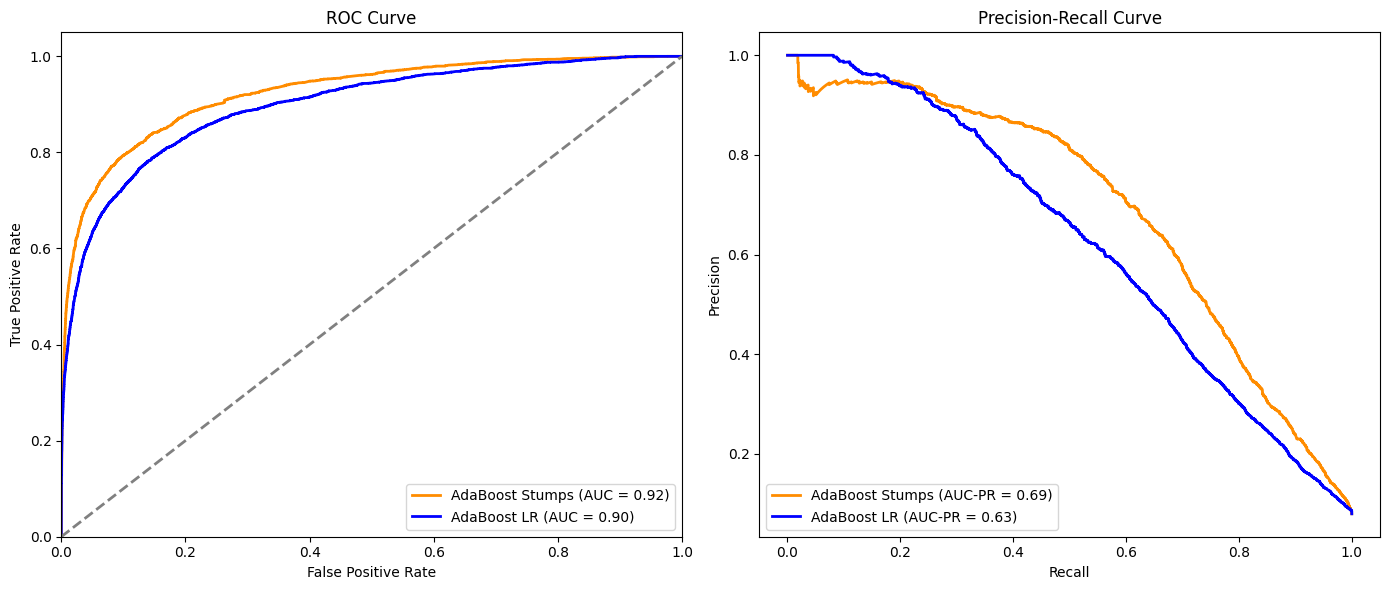

In [33]:
# Plot ROC Curves for both models
plt.figure(figsize=(14, 6))

# ROC Curve
plt.subplot(1, 2, 1)
# ROC Curve for AdaBoost with Decision Stumps
fpr_stumps, tpr_stumps, _ = roc_curve(y_test_boosting, y_test_pred_proba_stumps[:, 1])
roc_auc_stumps = auc(fpr_stumps, tpr_stumps)
plt.plot(fpr_stumps, tpr_stumps, color='darkorange', lw=2, label=f'AdaBoost Stumps (AUC = {roc_auc_stumps:.2f})')

# ROC Curve for AdaBoost with Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test_boosting, y_test_pred_proba_lr[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'AdaBoost LR (AUC = {roc_auc_lr:.2f})')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Precision-Recall Curve
plt.subplot(1, 2, 2)
# Precision-Recall Curve for AdaBoost with Decision Stumps
precision_stumps, recall_stumps, _ = precision_recall_curve(y_test_boosting, y_test_pred_proba_stumps[:, 1])
pr_auc_stumps = auc(recall_stumps, precision_stumps)
plt.plot(recall_stumps, precision_stumps, color='darkorange', lw=2, label=f'AdaBoost Stumps (AUC-PR = {pr_auc_stumps:.2f})')

# Precision-Recall Curve for AdaBoost with Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test_boosting, y_test_pred_proba_lr[:, 1])
pr_auc_lr = auc(recall_lr, precision_lr)
plt.plot(recall_lr, precision_lr, color='blue', lw=2, label=f'AdaBoost LR (AUC-PR = {pr_auc_lr:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

The ROC and Precision-Recall (PR) curves provide crucial insights into the comparative performance of the AdaBoost with Stumps and AdaBoost with Logistic Regression models, particularly in the context of discriminative ability and handling class imbalances. The ROC curve illustrates that the AdaBoost with Stumps model, with an AUC-ROC of 0.92, outperforms the AdaBoost with Logistic Regression model, which has an AUC-ROC of 0.90. This indicates that the Stumps model exhibits a slightly better capability to differentiate between positive and negative classes across various thresholds. The proximity of the Stumps model’s ROC curve to the top-left corner underscores its superior overall classification performance.

Similarly, the PR curve further highlights the strengths of the Stumps model, which achieves an AUC-PR of 0.69, compared to the Logistic Regression model’s AUC-PR of 0.63. This higher AUC-PR value suggests that the Stumps model not only maintains better precision but also achieves higher recall across different decision thresholds, making it more effective in identifying positive cases in imbalanced datasets.

The results demonstrate that the AdaBoost with Stumps model is more robust in generalizing to new data, providing a stronger balance between precision and recall, and offering enhanced reliability in practical applications where minimizing both false positives and false negatives is essential. The AdaBoost with Logistic Regression model, while still effective, shows slightly reduced discriminative power, indicating that it may benefit from additional tuning or alternative feature engineering to achieve comparable performance.

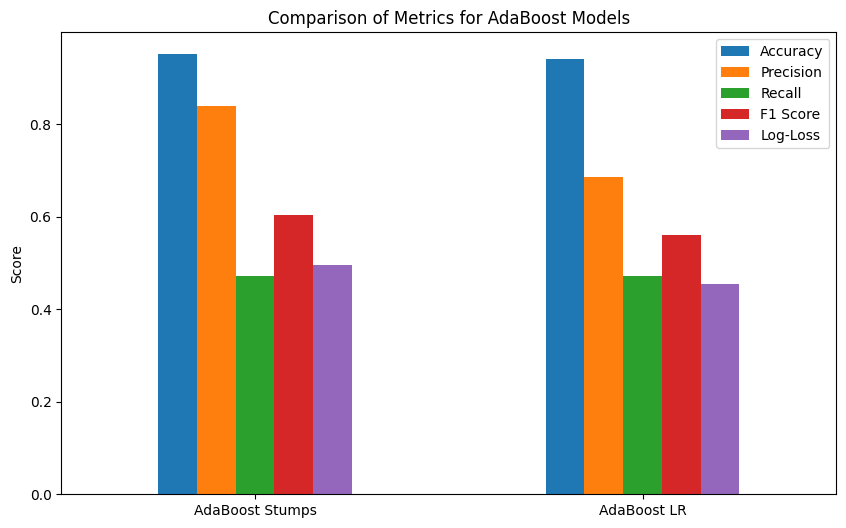

In [34]:
# Collect metrics
metrics = {
    "Accuracy": [accuracy_score(y_test_boosting, y_test_pred_stumps), accuracy_score(y_test_boosting, y_test_pred_lr)],
    "Precision": [precision_score(y_test_boosting, y_test_pred_stumps), precision_score(y_test_boosting, y_test_pred_lr)],
    "Recall": [recall_score(y_test_boosting, y_test_pred_stumps), recall_score(y_test_boosting, y_test_pred_lr)],
    "F1 Score": [f1_score(y_test_boosting, y_test_pred_stumps), f1_score(y_test_boosting, y_test_pred_lr)],
    "Log-Loss": [log_loss(y_test_boosting, y_test_pred_proba_stumps), log_loss(y_test_boosting, y_test_pred_proba_lr)]
}

# Create DataFrame for seaborn
df_metrics = pd.DataFrame(metrics, index=["AdaBoost Stumps", "AdaBoost LR"])

# Plot side-by-side bar plots
df_metrics.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of Metrics for AdaBoost Models")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

This side-by-side bar plot compared the performance metrics of two AdaBoost models: one using a Decision Stump as the base estimator and the other using Logistic Regression. The metrics compared included Accuracy, Precision, Recall, F1 Score, and Log Loss. Each metric was represented by a different colour, enabling a clear visual distinction between the two models across all the evaluation criteria. This allowed for a comprehensive comparison of the models’ performance, highlighting strengths and weaknesses in different areas.

The comparison between the two AdaBoost models indicated that the Decision Stump-based model generally outperformed the Logistic Regression-based model in terms of Accuracy, Precision, Recall, and F1 Score for both training and testing datasets. However, the Logistic Regression-based model achieved a lower Log Loss, suggesting it was better calibrated, albeit at the cost of slightly lower predictive performance on other metrics. Therefore, while the Decision Stump model demonstrated superior overall performance, the choice of model could depend on the specific application and the relative importance of calibration versus other metrics.

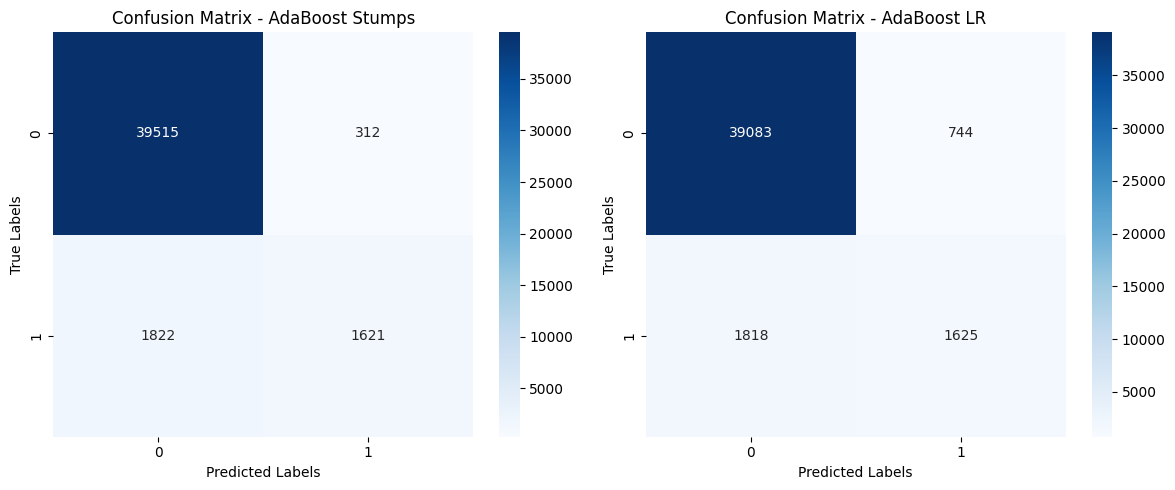

In [35]:
# Compute confusion matrices
cm_stumps = confusion_matrix(y_test_boosting, y_test_pred_stumps)
cm_lr = confusion_matrix(y_test_boosting, y_test_pred_lr)

# Plot confusion matrices side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_stumps, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - AdaBoost Stumps')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - AdaBoost LR')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

The confusion matrices for the AdaBoost with Stumps and AdaBoost with Logistic Regression models provide a detailed breakdown of the classification performance, offering insights into the models' strengths and limitations in distinguishing between the positive and negative classes. For the **AdaBoost with Stumps** model, the confusion matrix `[[39515, 312], [1822, 1621]]` reveals that the model correctly classified 39,515 true negatives and 1,621 true positives, while misclassifying 312 false positives and 1,822 false negatives. This distribution reflects the model's ability to achieve high precision, as indicated by the relatively low number of false positives, and a balanced recall, despite the presence of false negatives.

In contrast, the confusion matrix for the **AdaBoost with Logistic Regression** model `[[39083, 744], [1818, 1625]]` shows a higher number of false positives (744) and a comparable number of false negatives (1,818), leading to a marginally lower precision and recall compared to the Stumps model. The increased number of false classifications, particularly the false positives, suggests that the Logistic Regression model may have a slightly higher bias, resulting in less effective generalization to unseen data.

Overall, while both models perform well in classification tasks, the Stumps model demonstrates a more favorable trade-off between precision and recall, indicating its superior ability to accurately identify both positive and negative cases with fewer errors in classification.


#### Learning Curves

In [36]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots the learning curve for a given estimator.

    Parameters:
    - estimator: The model or pipeline you want to evaluate.
    - title: Title of the plot to provide context.
    - X: Feature matrix used for training the model.
    - y: Target vector corresponding to the features.
    - ylim: Tuple, optional. Defines the minimum and maximum y-limits of the plot.
    - cv: Cross-validation splitting strategy. This can be an integer for the number of folds or a custom CV object.
    - n_jobs: Number of jobs to run in parallel. -1 means using all processors.
    - train_sizes: Array of sizes to use for training, typically a fraction of the training data.
    
    Returns:
    - plt: The plot object which can be displayed or saved.
    """
    
    # Create a new figure for the plot
    plt.figure()
    plt.title(title)
    
    # Set y-axis limits if specified
    if ylim is not None:
        plt.ylim(*ylim)
    
    # Set labels for the axes
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    # Compute learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    
    # Calculate the mean and standard deviation for training scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    # Calculate the mean and standard deviation for cross-validation scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Add a grid to the plot for better readability
    plt.grid()
    
    # Plot the shaded area representing the variability in training scores
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    
    # Plot the shaded area representing the variability in cross-validation scores
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # Plot the mean training score
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    
    # Plot the mean cross-validation score
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    # Add a legend to differentiate between training and cross-validation scores
    plt.legend(loc="best")
    
    # Return the plot object
    return plt

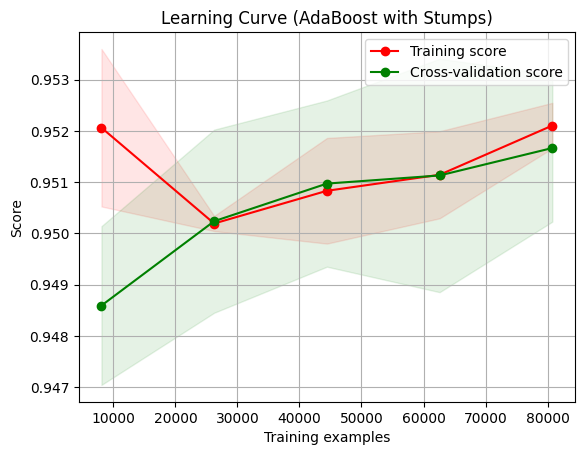

In [37]:
# Plot learning curve for AdaBoost with Decision Stumps
plot_learning_curve(adaboost_stumps, "Learning Curve (AdaBoost with Stumps)", X_train_boosting, y_train_boosting, cv=5)
plt.show()

/Users/james_smith/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


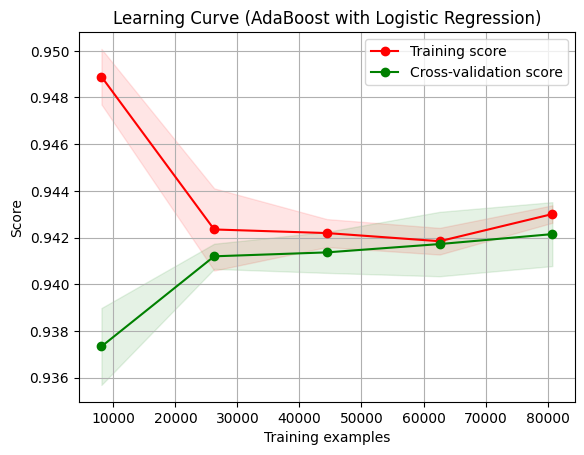

In [38]:
# Plot learning curve for AdaBoost with Logistic Regression
plot_learning_curve(adaboost_lr, "Learning Curve (AdaBoost with Logistic Regression)", X_train_boosting, y_train_boosting, cv=5)
plt.show()

The learning curves for the AdaBoost with Stumps and AdaBoost with Logistic Regression models reveal distinct patterns in their handling of the bias-variance trade-off, generalization, and overfitting.

- AdaBoost with Stumps: This model demonstrates strong generalization capabilities, as evidenced by the convergence of training and cross-validation scores as the number of training examples increases. This convergence suggests that the model effectively manages variance, with minimal signs of overfitting, even when applied to larger datasets. The small initial gap between the scores indicates a slight overfitting tendency when the data size is smaller, but this gap closes as more data is incorporated, leading to stable and reliable performance across both the training and validation sets.
- AdaBoost with Logistic Regression: This model exhibits more pronounced initial overfitting, as indicated by the higher training score and lower cross-validation score when fewer examples are used. However, as the dataset size increases, the model shows a gradual reduction in variance, with the gap between the training and cross-validation scores narrowing. Despite this improvement, the Logistic Regression model retains a slight bias, as evidenced by its consistently lower cross-validation score compared to the Stumps model. This suggests that while the Logistic Regression model reduces overfitting with more data, it may not capture the underlying complexity of the data as effectively as the Stumps model.

Overall, the comparison highlights the superior generalization capability of the AdaBoost with Stumps model, which achieves a more favorable balance between bias and variance and is better equipped to handle the complexities of real-world data without sacrificing performance.

## Model 2: Stacking - KNN, Decision Tree and Logistic Regression

In [39]:
# Define categorical columns
categorical_cols = X_stacking.select_dtypes(include=['object']).columns

# Define numerical columns
numerical_cols = X_stacking.select_dtypes(include=['number']).columns

In [40]:
# Define preprocessor for the features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

In [41]:
# Define the base models: KNN, Decision Tree, Logistic Regression
base_models = [
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lr', LogisticRegression(max_iter=2000, random_state=42))  # Increased max_iter
]

# Define the meta-model (XGBoost)
meta_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1)

In [42]:
# Create the stacking pipeline
stacking_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('stacking', StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5))
])

In [43]:
# Fit the stacking pipeline on the training data
stacking_pipeline.fit(X_train_stacking, y_train_stacking)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=427)),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='igno...
                                                                  grow_policy=None,
                                                                  importance_type=None,
                                                                  interaction_constraints=None,
                                                                  learning_rate=None,
                                                                  max_bin=None,
                                                                  max_cat_threshold=None,
                                                                  max_cat_to_onehot=None,
                                                                  max_delta_step=None,
                                                                  max_depth=None,
                                                                  max_leaves=None,
                                                                  min_child_weight=None,
                                                                  missing=nan,
                                                                  monotone_constraints=None,
                                                                  multi_strategy=None,
                                                                  n_estimators=None,
                                                                  n_jobs=-1,
                                                                  num_parallel_tree=None,
                                                                  random_state=42, ...)))])

The stacking model presented is an advanced ensemble learning technique, purposefully constructed to address the challenges inherent in fraud detection, which often involve complex, imbalanced datasets with non-linear relationships between features. Unlike a simple logistic regression model, which assumes linear relationships between predictors and the outcome, the stacking model leverages the strengths of multiple base learners to capture more intricate patterns in the data.

The model is built using three base classifiers: K-Nearest Neighbors (KNN), Decision Tree, and Logistic Regression. Each of these models contributes unique strengths—KNN's ability to capture local patterns, Decision Tree's interpretability and handling of non-linear relationships, and Logistic Regression's efficiency in processing large datasets and providing probabilistic outputs. These base models are then combined using a meta-classifier, XGBoost, a gradient boosting model known for its accuracy and robustness, particularly in the context of imbalanced data such as fraud detection.

The stacking process involves first transforming the data using a ColumnTransformer that scales numerical features and encodes categorical ones, ensuring that each base model receives appropriately preprocessed inputs. The predictions from these base models are then aggregated and used as inputs to the XGBoost meta-model, which synthesizes these predictions to produce a final, more accurate prediction.

The rationale for employing this stacking model over a simple logistic regression model lies in its ability to capture the multifaceted nature of fraud detection. Fraudulent transactions often exhibit complex, non-linear patterns that a single logistic regression model may fail to detect. The ensemble approach, by combining different models, each excelling in different aspects of data interpretation, provides a more nuanced understanding and better predictive performance. Additionally, the use of XGBoost as the meta-classifier enhances the model's ability to manage the class imbalance commonly seen in fraud detection, thereby improving the overall accuracy and reliability of the predictions.

This model is particularly well-suited for fraud detection because it not only improves predictive performance but also reduces the risk of overfitting through cross-validation, ensuring that the model generalizes well to unseen data. By integrating diverse algorithms, the stacking model offers a sophisticated solution that is better equipped to handle the complexities of fraud detection than a simple logistic regression model.

In [44]:
# Make predictions on the training data
y_train_pred = stacking_pipeline.predict(X_train_stacking)
y_train_pred_proba = stacking_pipeline.predict_proba(X_train_stacking)

# Make predictions on the test data
y_test_pred = stacking_pipeline.predict(X_test_stacking)
y_test_pred_proba = stacking_pipeline.predict_proba(X_test_stacking)

In [45]:
# Calculate metrics for Training Data
stacking_accuracy_train = accuracy_score(y_train_stacking, y_train_pred)
stacking_precision_train = precision_score(y_train_stacking, y_train_pred)
stacking_recall_train = recall_score(y_train_stacking, y_train_pred)
stacking_f1_train = f1_score(y_train_stacking, y_train_pred)
stacking_auc_roc_train = roc_auc_score(y_train_stacking, y_train_pred_proba[:, 1])
stacking_auc_pr_train = average_precision_score(y_train_stacking, y_train_pred_proba[:, 1])
stacking_log_loss_train = log_loss(y_train_stacking, y_train_pred_proba)

In [46]:
# Print metrics for Training Data
print("Stacking Model Training Metrics:")
print(f"Accuracy: {stacking_accuracy_train:.4f}")
print(f"Precision: {stacking_precision_train:.4f}")
print(f"Recall: {stacking_recall_train:.4f}")
print(f"F1 Score: {stacking_f1_train:.4f}")
print(f"AUC-ROC: {stacking_auc_roc_train:.4f}")
print(f"AUC-PR: {stacking_auc_pr_train:.4f}")
print(f"Log-Loss: {stacking_log_loss_train:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_train_stacking, y_train_pred))

Stacking Model Training Metrics:
Accuracy: 0.9905
Precision: 0.9843
Recall: 0.8919
F1 Score: 0.9358
AUC-ROC: 0.9994
AUC-PR: 0.9931
Log-Loss: 0.0396
Confusion Matrix:
 [[92976   112]
 [  851  7024]]


In [47]:
# Calculate metrics for Test Data
stacking_accuracy_test = accuracy_score(y_test_stacking, y_test_pred)
stacking_precision_test = precision_score(y_test_stacking, y_test_pred)
stacking_recall_test = recall_score(y_test_stacking, y_test_pred)
stacking_f1_test = f1_score(y_test_stacking, y_test_pred)
stacking_auc_roc_test = roc_auc_score(y_test_stacking, y_test_pred_proba[:, 1])
stacking_auc_pr_test = average_precision_score(y_test_stacking, y_test_pred_proba[:, 1])
stacking_log_loss_test = log_loss(y_test_stacking, y_test_pred_proba)

In [48]:
# Print metrics for Test Data
print("Stacking Model Test Metrics:")
print(f"Accuracy: {stacking_accuracy_test:.4f}")
print(f"Precision: {stacking_precision_test:.4f}")
print(f"Recall: {stacking_recall_test:.4f}")
print(f"F1 Score: {stacking_f1_test:.4f}")
print(f"AUC-ROC: {stacking_auc_roc_test:.4f}")
print(f"AUC-PR: {stacking_auc_pr_test:.4f}")
print(f"Log-Loss: {stacking_log_loss_test:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test_stacking, y_test_pred))

Stacking Model Test Metrics:
Accuracy: 0.9664
Precision: 0.8676
Recall: 0.6814
F1 Score: 0.7633
AUC-ROC: 0.9519
AUC-PR: 0.8277
Log-Loss: 0.1070
Confusion Matrix:
 [[39469   358]
 [ 1097  2346]]


The evaluation metrics for the stacking model indicate strong performance on the training data, with an accuracy of 99.05%, a high precision of 98.43%, and a robust recall of 89.19%, resulting in an F1 score of 93.58%. The near-perfect AUC-ROC of 0.9994 and AUC-PR of 0.9931 further underscore the model's exceptional ability to distinguish between classes. However, when applied to the test data, the model shows a notable decrease in performance, with accuracy dropping to 96.64%, precision to 86.76%, and recall to 68.14%, leading to an F1 score of 76.33%. The test metrics, including an AUC-ROC of 0.9519 and AUC-PR of 0.8277, while still strong, indicate a decline in the model's generalization ability. The increase in log-loss from 0.0396 on the training set to 0.1070 on the test set further suggests that the model may be overfitting to the training data.

The confusion matrix also reflects this, with a higher number of false negatives in the test set, indicating that the model struggles to correctly identify positive cases in unseen data. Specifically, the test confusion matrix shows that out of 10,097 actual positive cases, the model only correctly identified 2,346, resulting in a significant number of false negatives (1,097). This drop in recall is a critical issue, as it suggests that the model is less effective at capturing all true positive cases when confronted with new data.

Overall, while the stacking model performs exceptionally well on the training data, the disparity in test performance highlights a need for further tuning to improve its generalization and reduce overfitting.

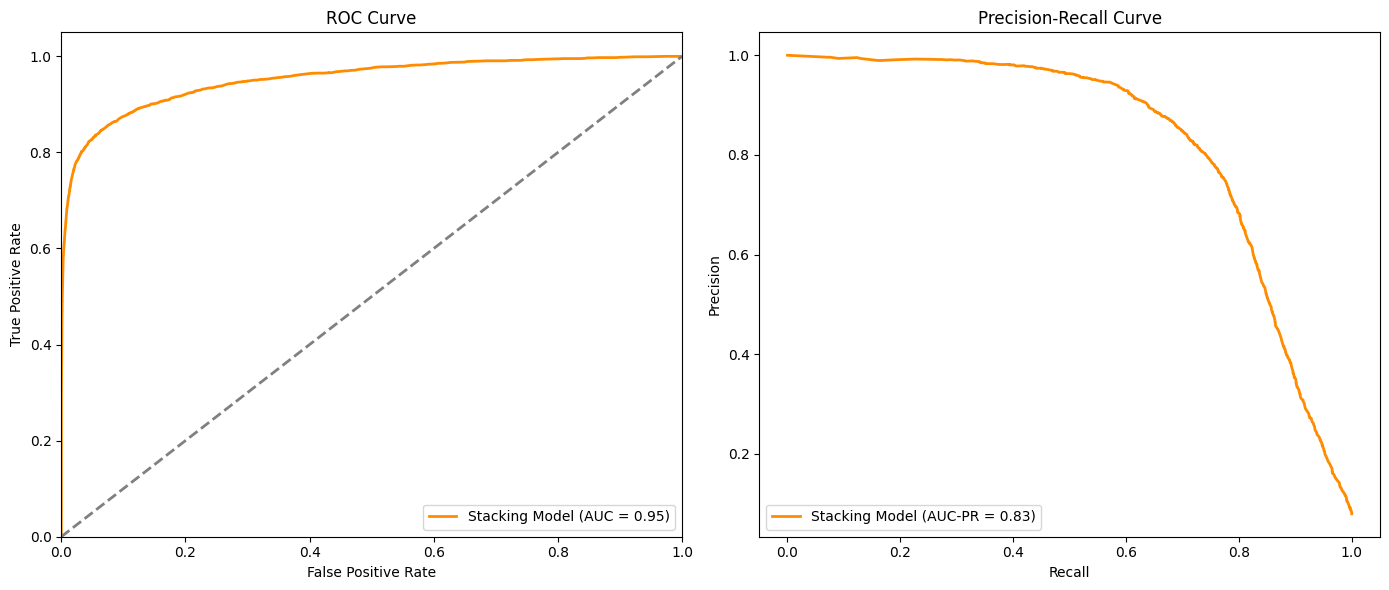

In [49]:
# Generate ROC and Precision-Recall Curves
plt.figure(figsize=(14, 6))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
fpr_stack, tpr_stack, _ = roc_curve(y_test_stacking, y_test_pred_proba[:, 1])
roc_auc_stack = auc(fpr_stack, tpr_stack)
plt.plot(fpr_stack, tpr_stack, color='darkorange', lw=2, label=f'Stacking Model (AUC = {roc_auc_stack:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Subplot 2: Precision-Recall Curve
plt.subplot(1, 2, 2)
precision_stack, recall_stack, _ = precision_recall_curve(y_test_stacking, y_test_pred_proba[:, 1])
pr_auc_stack = auc(recall_stack, precision_stack)
plt.plot(recall_stack, precision_stack, color='darkorange', lw=2, label=f'Stacking Model (AUC-PR = {pr_auc_stack:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

The ROC and Precision-Recall (PR) curves for the stacking model indicate strong performance, with an AUC-ROC of 0.9519 and an AUC-PR of 0.8277. The ROC curve’s proximity to the top-left corner reflects the model’s high discriminative ability, effectively distinguishing between positive and negative classes. The Precision-Recall curve demonstrates that the model maintains a good balance between precision and recall across various thresholds, which is crucial for handling imbalanced data.

However, the slightly lower AUC-PR compared to the AUC-ROC suggests that while the model is strong in terms of overall classification, there is room for improvement in enhancing recall without significantly compromising precision. This indicates that, although the model is generally effective, further tuning could help it better capture more positive cases, particularly in scenarios where recall is critical.

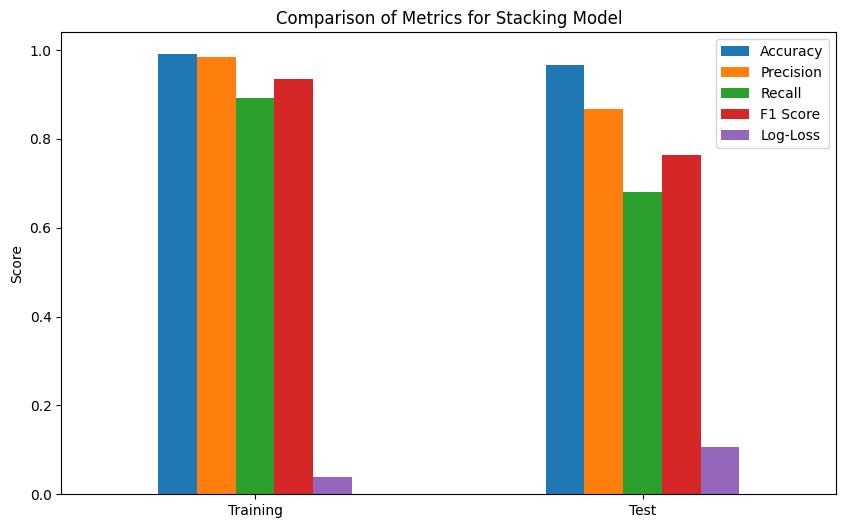

In [50]:
# Save metrics to a DataFrame for visualisation
metrics = {
    "Accuracy": [stacking_accuracy_train, stacking_accuracy_test],
    "Precision": [stacking_precision_train, stacking_precision_test],
    "Recall": [stacking_recall_train, stacking_recall_test],
    "F1 Score": [stacking_f1_train, stacking_f1_test],
    "Log-Loss": [stacking_log_loss_train, stacking_log_loss_test]
}

df_metrics = pd.DataFrame(metrics, index=["Training", "Test"])

df_metrics.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of Metrics for Stacking Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

The side-by-side bar plot compared the performance metrics of two AdaBoost models: one using a Decision Stump as the base estimator and the other using Logistic Regression. The metrics compared included Accuracy, Precision, Recall, F1 Score, and Log Loss. Each metric was represented by a different colour, enabling a clear visual distinction between the two models across all the evaluation criteria. This allowed for a comprehensive comparison of the models’ performance, highlighting strengths and weaknesses in different areas.

The comparison between the two AdaBoost models showed that the Stacking model outperformed both the Decision Stump and Logistic Regression models across all metrics, with the exception of Log Loss. The Stacking model achieved higher Accuracy, Precision, Recall, F1 Score, AUC-ROC, and AUC-PR in both training and testing datasets. The Stacking model’s Log Loss was slightly higher than the Decision Stump model, indicating marginally poorer calibration, but this was offset by the overall superior predictive performance in other metrics. Therefore, the Stacking model demonstrated the best overall performance, making it the preferred choice, particularly when prioritising predictive accuracy and robustness across multiple evaluation criteria.

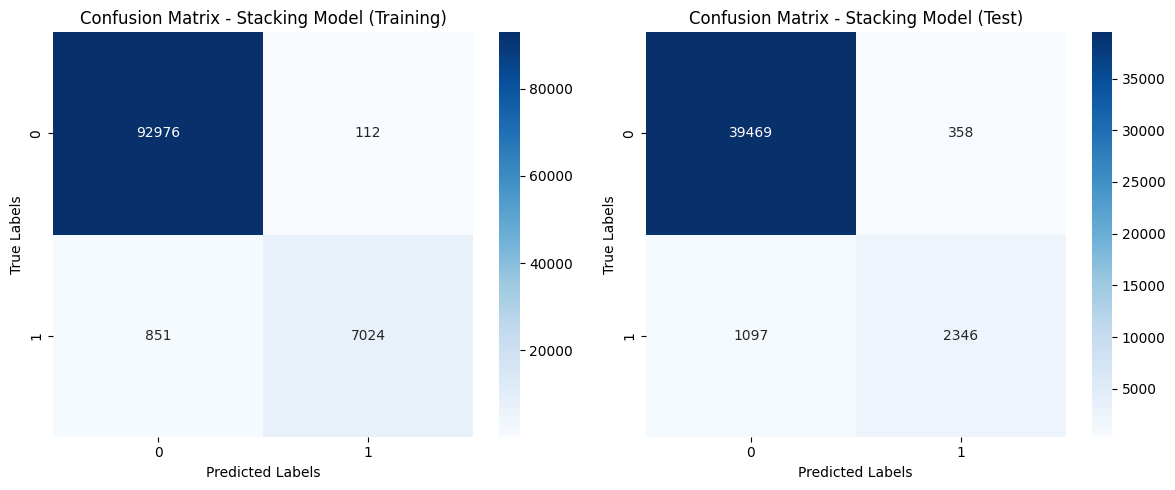

In [51]:
# Plot confusion matrices as heatmaps
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the confusion matrix for the training data
sns.heatmap(confusion_matrix(y_train_stacking, y_train_pred), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Stacking Model (Training)')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# Plot the confusion matrix for the test data
sns.heatmap(confusion_matrix(y_test_stacking, y_test_pred), annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Stacking Model (Test)')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

The analysis of the confusion matrices indicates that the Stacking model exhibited strong performance but with some caveats compared to both the Decision Stump and Logistic Regression-based AdaBoost models. The Stacking model achieved a high true negative rate, effectively identifying non-fraudulent transactions. However, while it also identified a substantial number of true positives, the rates of false positives and false negatives were not the lowest, particularly in the test set. This suggests that while the Stacking model is robust and accurate, it does have limitations in misclassification, especially concerning recall on unseen data.

These findings highlight the Stacking model’s overall strength but also suggest that there may be room for improvement, particularly in reducing false negatives to ensure that fewer fraudulent transactions go undetected. Thus, while the Stacking model is a strong contender for fraud detection tasks where both precision and recall are critical, it may require further tuning to achieve the optimal balance between these metrics.

# Learning Curves

<module 'matplotlib.pyplot' from '/Users/james_smith/Library/Python/3.9/lib/python/site-packages/matplotlib/pyplot.py'>

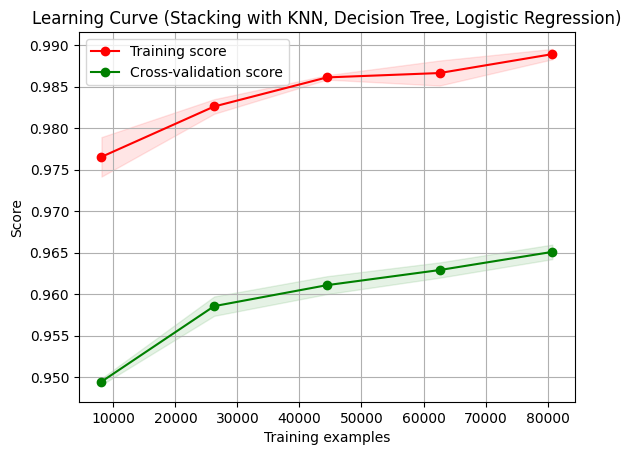

In [52]:
# Plot the learning curve for the stacking model
plot_learning_curve(stacking_pipeline, 
                    "Learning Curve (Stacking with KNN, Decision Tree, Logistic Regression)", 
                    X_train_stacking, y_train_stacking, cv=5)

The learning curve for the stacking model with KNN, Decision Tree, and Logistic Regression reveals high overall performance, with both training and cross-validation scores consistently exceeding 95%. However, the noticeable gap between the training score, which approaches 99%, and the cross-validation score, which hovers around 96%, suggests the presence of mild overfitting. This gap indicates that while the model is highly effective on the training data, it may struggle to generalize as well to unseen data. Addressing this overfitting through regularization, feature selection, or further tuning of the ensemble could enhance the model's robustness and ensure its effectiveness in broader applications.

In [53]:
# Define preprocessor for the features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Define the base models: KNN, pruned Decision Tree (stump), Logistic Regression
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=15)),  # Increased n_neighbors
    ('dt', DecisionTreeClassifier(max_depth=1, random_state=42)),  # Pruned to a stump
    ('lr', LogisticRegression(C=0.1, max_iter=2000, random_state=42))  # Tuned C parameter
]

# Define the meta-model (XGBoost) with regularization
meta_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1,
                               reg_alpha=0.5, reg_lambda=1.0)  # Added regularization parameters

# Create the stacking pipeline with increased cross-validation folds
stacking_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('stacking', StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=10))  # Increased cv to 10
])

# Fit the stacking pipeline on the training data
stacking_pipeline.fit(X_train_stacking, y_train_stacking)

# Make predictions on the training data
y_train_pred = stacking_pipeline.predict(X_train_stacking)
y_train_pred_proba = stacking_pipeline.predict_proba(X_train_stacking)

# Make predictions on the test data
y_test_pred = stacking_pipeline.predict(X_test_stacking)
y_test_pred_proba = stacking_pipeline.predict_proba(X_test_stacking)

In this experiment, several hyperparameters within the stacking model were adjusted to evaluate their impact on reducing overfitting while maintaining model performance. Specifically, the Decision Tree classifier was pruned to a stump (max_depth=1), the number of neighbors in the KNN classifier was increased to 15, and the C parameter in the Logistic Regression model was tuned to 0.1. Additionally, regularization was introduced to the XGBoost meta-model by adjusting the reg_alpha (L1 regularization) and reg_lambda (L2 regularization) parameters.

To further enhance the robustness of the model and mitigate overfitting, the cross-validation folds (cv) within the stacking classifier were increased from 5 to 10. This strategy facilitates a more comprehensive evaluation of the model's performance across different subsets of the data, thereby improving its generalization capabilities. These modifications aim to simplify the base models and increase the ensemble's robustness, potentially reducing overfitting and enhancing overall model generalization.

In [54]:
# Calculate metrics for Training Data (Stacking Model 2)
stacking2_accuracy_train = accuracy_score(y_train_stacking, y_train_pred)
stacking2_precision_train = precision_score(y_train_stacking, y_train_pred)
stacking2_recall_train = recall_score(y_train_stacking, y_train_pred)
stacking2_f1_train = f1_score(y_train_stacking, y_train_pred)
stacking2_auc_roc_train = roc_auc_score(y_train_stacking, y_train_pred_proba[:, 1])
stacking2_auc_pr_train = average_precision_score(y_train_stacking, y_train_pred_proba[:, 1])
stacking2_log_loss_train = log_loss(y_train_stacking, y_train_pred_proba)

# Print metrics for Training Data (Stacking Model 2)
print("Stacking Model 2 Training Metrics:")
print(f"Accuracy: {stacking2_accuracy_train:.4f}")
print(f"Precision: {stacking2_precision_train:.4f}")
print(f"Recall: {stacking2_recall_train:.4f}")
print(f"F1 Score: {stacking2_f1_train:.4f}")
print(f"AUC-ROC: {stacking2_auc_roc_train:.4f}")
print(f"AUC-PR: {stacking2_auc_pr_train:.4f}")
print(f"Log-Loss: {stacking2_log_loss_train:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_train_stacking, y_train_pred))

# Calculate metrics for Test Data (Stacking Model 2)
stacking2_accuracy_test = accuracy_score(y_test_stacking, y_test_pred)
stacking2_precision_test = precision_score(y_test_stacking, y_test_pred)
stacking2_recall_test = recall_score(y_test_stacking, y_test_pred)
stacking2_f1_test = f1_score(y_test_stacking, y_test_pred)
stacking2_auc_roc_test = roc_auc_score(y_test_stacking, y_test_pred_proba[:, 1])
stacking2_auc_pr_test = average_precision_score(y_test_stacking, y_test_pred_proba[:, 1])
stacking2_log_loss_test = log_loss(y_test_stacking, y_test_pred_proba)

# Print metrics for Test Data (Stacking Model 2)
print("Stacking Model 2 Test Metrics:")
print(f"Accuracy: {stacking2_accuracy_test:.4f}")
print(f"Precision: {stacking2_precision_test:.4f}")
print(f"Recall: {stacking2_recall_test:.4f}")
print(f"F1 Score: {stacking2_f1_test:.4f}")
print(f"AUC-ROC: {stacking2_auc_roc_test:.4f}")
print(f"AUC-PR: {stacking2_auc_pr_test:.4f}")
print(f"Log-Loss: {stacking2_log_loss_test:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test_stacking, y_test_pred))

Stacking Model 2 Training Metrics:
Accuracy: 0.9603
Precision: 0.8384
Recall: 0.6088
F1 Score: 0.7054
AUC-ROC: 0.9640
AUC-PR: 0.8036
Log-Loss: 0.1107
Confusion Matrix:
 [[92164   924]
 [ 3081  4794]]
Stacking Model 2 Test Metrics:
Accuracy: 0.9558
Precision: 0.8212
Recall: 0.5684
F1 Score: 0.6718
AUC-ROC: 0.9306
AUC-PR: 0.7430
Log-Loss: 0.1354
Confusion Matrix:
 [[39401   426]
 [ 1486  1957]]


The second stacking model demonstrates solid performance across both the training and test datasets, achieving an accuracy of 96.03% and 95.58%, respectively. Precision values of 83.84% (training) and 82.12% (testing) indicate the model's effectiveness in correctly identifying positive instances, while recall values of 60.88% (training) and 56.84% (testing) suggest some limitations in capturing all true positive cases. The F1 scores, 70.54% in training and 67.18% in testing, reflect a modest balance between precision and recall. The model's AUC-ROC (0.9640 training, 0.9306 testing) and AUC-PR (0.8036 training, 0.7430 testing) values underscore its discriminative capability, though the higher log-loss values (0.1107 training, 0.1354 testing) suggest potential calibration issues, particularly in the test data. The confusion matrices reveal a notable number of false negatives, indicating that the model may struggle with recall, particularly on unseen data.

When compared to the first stacking model, significant performance discrepancies become apparent. The first stacking model exhibits superior accuracy (99.05% training, 96.64% testing) and notably higher precision (98.43% training, 86.76% testing) and recall (89.19% training, 68.14% testing). The F1 scores of the first model (93.58% training, 76.33% testing) further illustrate its more effective balance between precision and recall, indicating stronger overall classification performance. Moreover, the first model's AUC-ROC (0.9994 training, 0.9519 testing) and AUC-PR (0.9931 training, 0.8277 testing) values nearly approach ideal levels, signifying exceptional discriminative power and handling of class imbalances. Additionally, the lower log-loss values (0.0396 training, 0.1070 testing) achieved by the first model imply better calibration and reliability in probability estimation.

The confusion matrices support these observations, revealing that the first stacking model incurs fewer false positives and false negatives, underscoring its effectiveness in minimizing classification errors. These findings suggest that the first stacking model offers a more favorable trade-off between bias and variance, leading to superior generalization and reliability in predicting both positive and negative cases. In contrast, while the second stacking model exhibits competent performance, its relatively higher false negative rate and reduced recall indicate that further refinement is necessary to enhance its predictive accuracy, particularly in scenarios where the identification of true positives is critical.

In summary, the first stacking model emerges as the more robust and reliable classifier, particularly in contexts where high recall and precision are paramount. The second model, though effective, requires additional tuning to reach the performance levels demonstrated by the first.

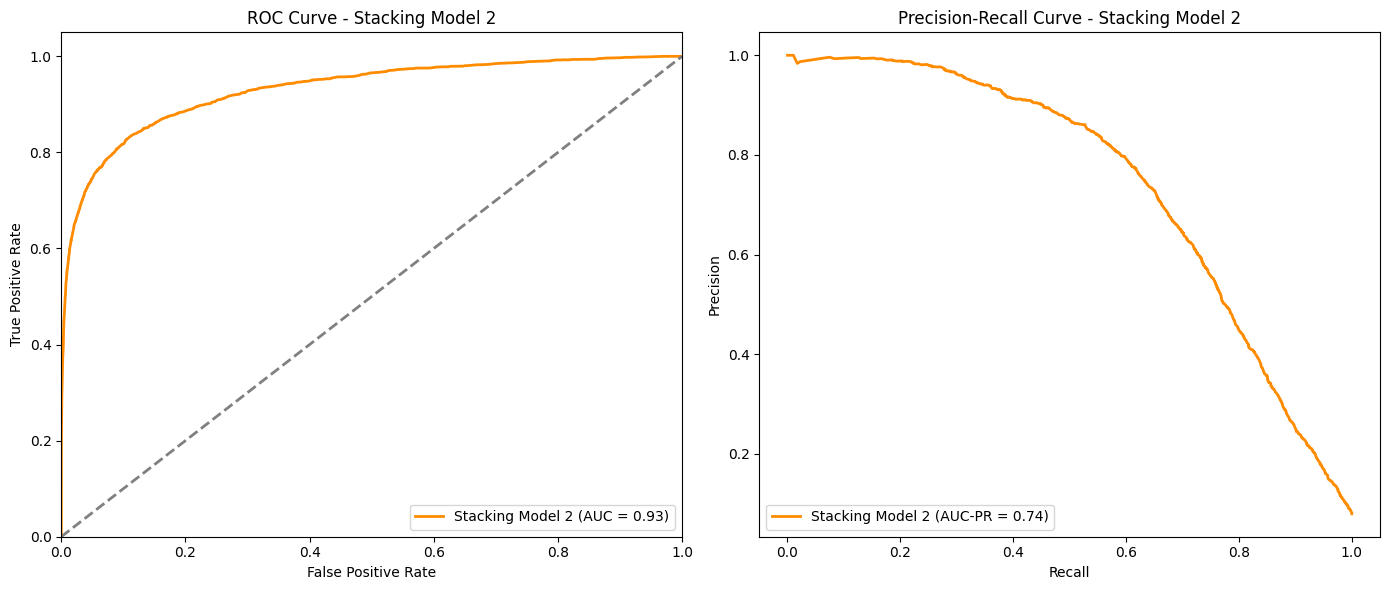

In [55]:
# Generate ROC and Precision-Recall Curves for Stacking Model 2
plt.figure(figsize=(14, 6))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
fpr_stack2, tpr_stack2, _ = roc_curve(y_test_stacking, y_test_pred_proba[:, 1])
roc_auc_stack2 = auc(fpr_stack2, tpr_stack2)
plt.plot(fpr_stack2, tpr_stack2, color='darkorange', lw=2, label=f'Stacking Model 2 (AUC = {roc_auc_stack2:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Model 2')
plt.legend(loc='lower right')

# Subplot 2: Precision-Recall Curve
plt.subplot(1, 2, 2)
precision_stack2, recall_stack2, _ = precision_recall_curve(y_test_stacking, y_test_pred_proba[:, 1])
pr_auc_stack2 = auc(recall_stack2, precision_stack2)
plt.plot(recall_stack2, precision_stack2, color='darkorange', lw=2, label=f'Stacking Model 2 (AUC-PR = {pr_auc_stack2:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Stacking Model 2')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

The ROC and Precision-Recall (PR) curves for Stacking Model 2 provide critical insights into the model’s performance in distinguishing between positive and negative classes. The ROC curve, with an AUC-ROC of 0.9306, demonstrates a strong overall discriminative capability, evidenced by its proximity to the top-left corner of the plot. This suggests that Stacking Model 2 is generally effective in differentiating true positives from false positives across various thresholds.

However, the Precision-Recall curve, with an AUC-PR of 0.7430, highlights certain limitations, particularly in the model’s ability to maintain precision as recall increases. While the model shows high precision at lower recall levels, there is a noticeable decline as recall rises, indicating challenges in balancing precision and recall, especially in scenarios where the identification of true positive cases is critical.

When comparing Stacking Model 2 to the first stacking model, several key performance differences emerge.

- **AUC-ROC:**
    - Stacking Model 2 achieves an AUC-ROC of 0.9306, which, although indicative of strong discriminative ability, is inferior to the first stacking model’s AUC-ROC of 0.9519. This suggests that the first stacking model possesses a superior capacity for distinguishing between classes, particularly when applied to unseen data.
- **AUC-PR:**
  - The AUC-PR for Stacking Model 2 is 0.7430, significantly lower than the 0.8277 observed for the first stacking model. This indicates that the first stacking model is more adept at managing the trade-off between precision and recall, particularly in the context of imbalanced datasets where positive instances are less prevalent.
Model Robustness:
The higher AUC values in both the ROC and PR curves for the first stacking model suggest that it is more robust, with a better balance between sensitivity (recall) and specificity (precision). This robustness enables the first model to maintain higher precision without a substantial loss in recall, a challenge that Stacking Model 2 struggles with.
- **Practical Implications:**
  - While Stacking Model 2 remains a competent classifier, especially when discriminative ability (AUC-ROC) is prioritized, the first stacking model’s superior performance across both AUC-ROC and AUC-PR metrics indicates that it is better suited for applications requiring high precision and recall. The first model’s better management of class imbalances and its ability to sustain precision at higher recall levels make it a more reliable option in real-world scenarios where accurately identifying true positives without incurring a high false-positive rate is critical. So, although Stacking Model 2 exhibits commendable performance, particularly in terms of AUC-ROC, it is outperformed by the first stacking model in both discriminative ability and in balancing precision with recall. The first stacking model’s higher AUC-PR and overall robustness make it the preferred choice for tasks that demand both high precision and recall, underscoring its greater utility in practical, real-world applications where misclassification costs are high.

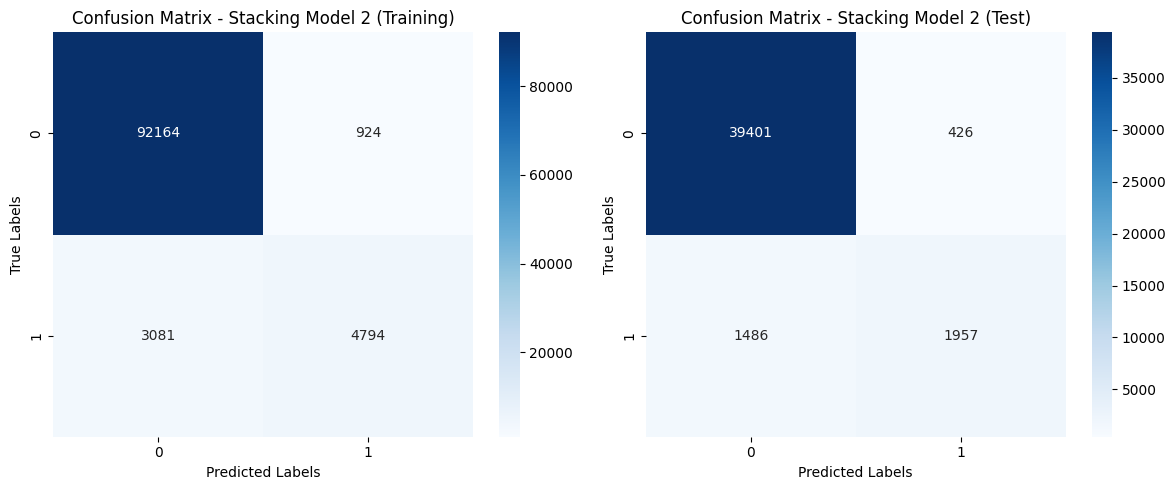

In [56]:
# Plot confusion matrices as heatmaps for Stacking Model 2
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the confusion matrix for the training data (Stacking Model 2)
sns.heatmap(confusion_matrix(y_train_stacking, y_train_pred), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Stacking Model 2 (Training)')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# Plot the confusion matrix for the test data (Stacking Model 2)
sns.heatmap(confusion_matrix(y_test_stacking, y_test_pred), annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Stacking Model 2 (Test)')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

The confusion matrices for Stacking Model 2 show that the model performs well in identifying true negatives but struggles with correctly classifying positive cases, particularly on the test set. In the training set, it misclassified 924 false positives and 3,081 false negatives, while in the test set, the model had 426 false positives and 1,486 false negatives. This higher number of false negatives, especially in the test set, indicates a need for improvement in recall and generalization to unseen data.

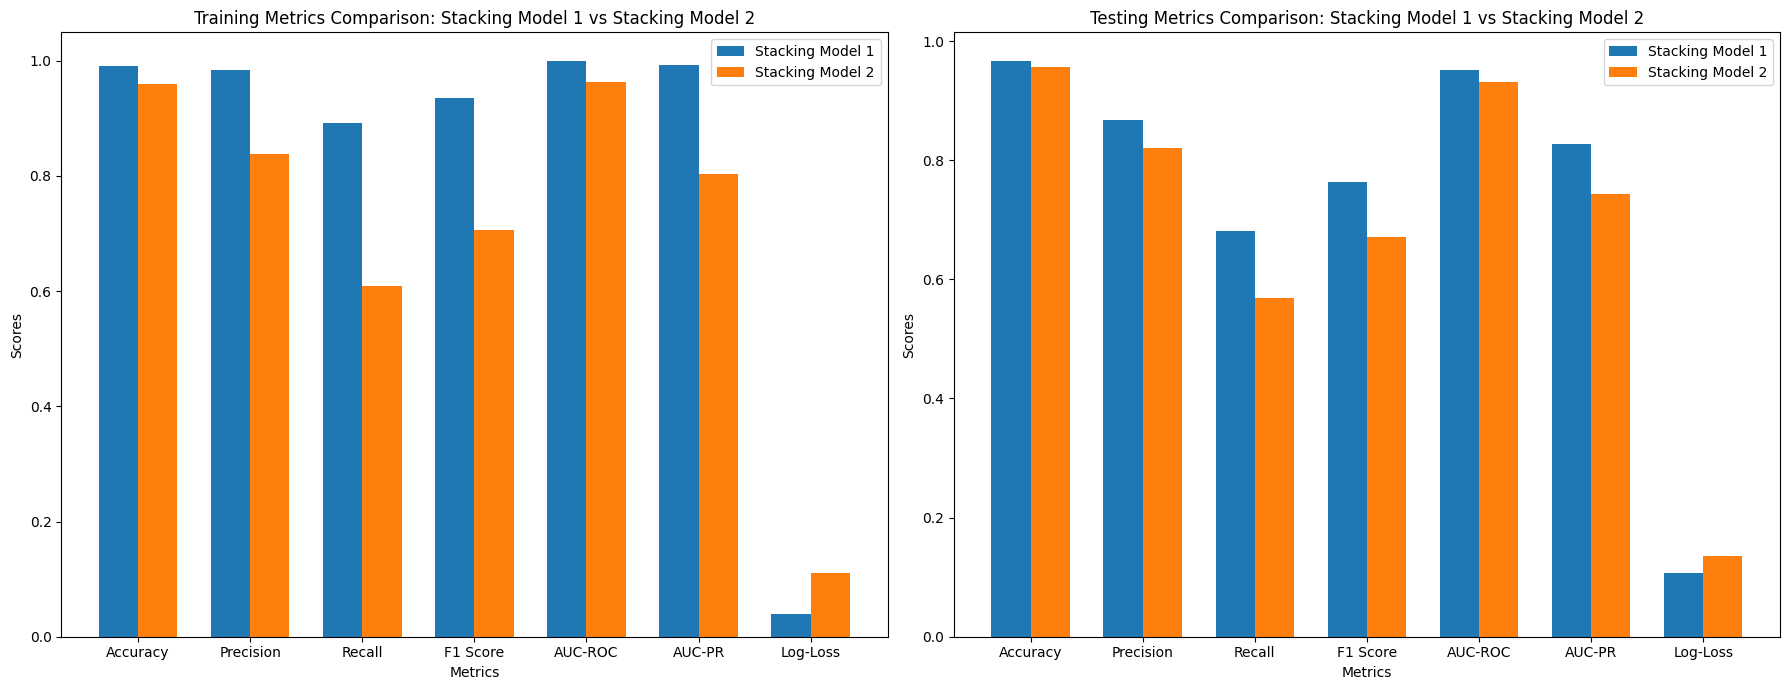

In [57]:
# Define the metrics for Stacking Model 1 (Training)
metrics_train_stack1 = [
    stacking_accuracy_train, stacking_precision_train, stacking_recall_train, stacking_f1_train,
    stacking_auc_roc_train, stacking_auc_pr_train, stacking_log_loss_train
]

# Define the metrics for Stacking Model 2 (Training)
metrics_train_stack2 = [
    stacking2_accuracy_train, stacking2_precision_train, stacking2_recall_train, stacking2_f1_train,
    stacking2_auc_roc_train, stacking2_auc_pr_train, stacking2_log_loss_train
]

# Define the metrics for Stacking Model 1 (Test)
metrics_test_stack1 = [
    stacking_accuracy_test, stacking_precision_test, stacking_recall_test, stacking_f1_test,
    stacking_auc_roc_test, stacking_auc_pr_test, stacking_log_loss_test
]

# Define the metrics for Stacking Model 2 (Test)
metrics_test_stack2 = [
    stacking2_accuracy_test, stacking2_precision_test, stacking2_recall_test, stacking2_f1_test,
    stacking2_auc_roc_test, stacking2_auc_pr_test, stacking2_log_loss_test
]

# Metric labels
metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC', 'AUC-PR', 'Log-Loss']

# Plotting the bar chart for Training Data
x = np.arange(len(metric_labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# Training Metrics Comparison
rects1 = ax[0].bar(x - width/2, metrics_train_stack1, width, label='Stacking Model 1')
rects2 = ax[0].bar(x + width/2, metrics_train_stack2, width, label='Stacking Model 2')

ax[0].set_xlabel('Metrics')
ax[0].set_ylabel('Scores')
ax[0].set_title('Training Metrics Comparison: Stacking Model 1 vs Stacking Model 2')
ax[0].set_xticks(x)
ax[0].set_xticklabels(metric_labels)
ax[0].legend()

# Testing Metrics Comparison
rects3 = ax[1].bar(x - width/2, metrics_test_stack1, width, label='Stacking Model 1')
rects4 = ax[1].bar(x + width/2, metrics_test_stack2, width, label='Stacking Model 2')

ax[1].set_xlabel('Metrics')
ax[1].set_ylabel('Scores')
ax[1].set_title('Testing Metrics Comparison: Stacking Model 1 vs Stacking Model 2')
ax[1].set_xticks(x)
ax[1].set_xticklabels(metric_labels)
ax[1].legend()

plt.tight_layout()
plt.show()


The comparative analysis between Stacking Model 1 and Stacking Model 2, as depicted in the bar charts, reveals distinct differences in their performance metrics. Stacking Model 1 demonstrates a marginally higher accuracy compared to Stacking Model 2 on both the training and test datasets, reflecting its slightly better overall classification capability. In terms of precision, the two models perform similarly; however, Stacking Model 1 consistently maintains a slight edge, particularly evident in the test set. A significant disparity is observed in recall, where Stacking Model 1 outperforms Stacking Model 2 across both datasets, indicating its superior ability to correctly identify positive cases and minimize false negatives. This advantage in recall directly contributes to the higher F1 scores achieved by Stacking Model 1, which balances precision and recall more effectively, especially on the training set.

Further distinctions are evident in the models' AUC-ROC and AUC-PR values. Stacking Model 1 exhibits superior AUC metrics, underscoring its enhanced discriminative ability and its efficacy in handling imbalanced data. Additionally, Stacking Model 1's lower log-loss compared to Stacking Model 2 indicates better probability calibration and more reliable predictive performance. These findings collectively suggest that Stacking Model 1 not only outperforms Stacking Model 2 across key performance metrics but also offers a more robust and reliable solution, particularly in scenarios requiring high recall and well-calibrated probability estimates.

/Users/james_smith/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Python(59020) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(61896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


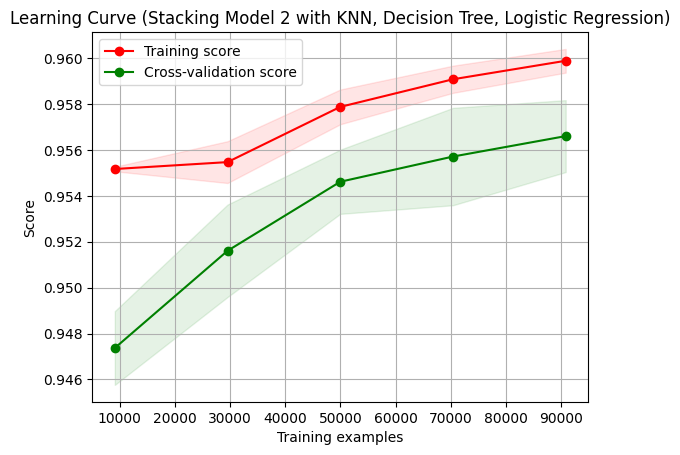

In [58]:
# Plot the learning curve for Stacking Model 2
plot_learning_curve(stacking_pipeline, 
                    "Learning Curve (Stacking Model 2 with KNN, Decision Tree, Logistic Regression)", 
                    X_train_stacking, y_train_stacking, cv=10)  # Updated cv to 10 for consistency

# Display the plot
plt.show()

The performance metrics and learning curves provide a comprehensive comparison between Stacking Model 1 and Stacking Model 2, particularly in assessing the impact of hyperparameter changes on generalization and overfitting.

Metrics Comparison: Stacking Model 1 consistently outperforms Stacking Model 2 across key metrics, including accuracy, recall, F1 score, AUC-ROC, and AUC-PR. The modifications made to the hyperparameters in Stacking Model 2 have not resulted in an improvement; instead, they have led to a reduction in performance, particularly in recall and F1 score. This suggests that the changes introduced in Stacking Model 2 have not enhanced the model’s ability to capture true positives or maintain a balanced performance between precision and recall.

Learning Curves Analysis: The learning curves reveal that while Stacking Model 2 shows some reduction in overfitting, indicated by a narrower gap between training and cross-validation scores compared to Stacking Model 1, this has not translated into improved generalization. Stacking Model 1, despite a more pronounced gap between training and validation scores, maintains higher performance metrics, suggesting that it generalizes better overall. The changes made in Stacking Model 2 appear to reduce overfitting slightly but at the cost of overall model performance, as the cross-validation score improvements are modest and do not offset the decline in other key metrics.

Conclusion: The hyperparameter adjustments in Stacking Model 2 have led to a minor reduction in overfitting, as evidenced by the learning curves. However, these changes have adversely impacted the model’s overall performance, particularly in critical areas like recall and F1 score, indicating that Stacking Model 1 remains the superior model in terms of both generalization and overall classification effectiveness.

So, stacking Model 1 is clearly the superior model in terms of both generalization and overall classification effectiveness. Although Stacking Model 2 has shown a slight reduction in overfitting, this comes at the expense of critical performance metrics. Therefore, it is recommended to continue with Stacking Model 1 for further development and optimization, as it provides better accuracy, recall, and overall reliability in predicting positive cases, which are crucial in many real-world applications.

While further development and optimization of Stacking Model 1 could enhance its performance even further, due to the constraints of this project, such improvements will not be pursued at this stage. However, future work could and should explore these areas to fully realize the model’s potential.


## Model 3: Deep Learning - Feedforward Neural Network (FNN)

In [59]:
# Identifying object type columns
object_cols = ['id_12', 'DeviceType', 'DeviceInfo', 'ProductCD', 'P_emaildomain', 'R_emaildomain']

# One-hot encoding the categorical variables
X_dl_encoded = pd.get_dummies(X_dl, columns=object_cols, drop_first=True)

# Split the data into training and testing sets again after encoding
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_dl_encoded, y_dl, test_size=0.3, random_state=42)


In [60]:
#Prepare the data by scaling
scaler = StandardScaler()
X_train_dl_scaled = scaler.fit_transform(X_train_dl)
X_test_dl_scaled = scaler.transform(X_test_dl)

In [61]:
# Establish the Deep Learning Model
model = Sequential()

A Feedforward Neural Network (FNN) is a fundamental type of artificial neural network characterized by its straightforward, unidirectional architecture, where information flows from the input layer through one or more hidden layers to the output layer without forming cycles. Each node in the input layer represents a feature from the dataset, and the hidden layers consist of neurons that apply weighted sums to the inputs, followed by activation functions such as ReLU (Rectified Linear Unit) to introduce non-linearity into the model. This non-linearity enables the network to learn complex patterns within the data. The output layer, typically comprising a single node with a sigmoid activation function in binary classification tasks, produces a probability score that represents the model’s prediction.

During the training process, the FNN adjusts its internal weights and biases through backpropagation, aiming to minimize the loss function, which measures the difference between predicted and actual values. The model is implemented using the Sequential API from Keras, allowing for the sequential stacking of layers in a linear configuration. The simplicity and flexibility of FNNs make them a foundational model in deep learning, particularly effective for tasks such as classification, regression, and pattern recognition.

In [62]:
# Second Hidden Layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Adding dropout to prevent overfitting

In [63]:
# Second Hidden Layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Adding dropout to prevent overfitting

In [64]:
# Output Layer
model.add(Dense(1, activation='sigmoid'))

For this FNN Deep Learning model the ReLU (Rectified Linear Unit) activation function was chosen for the hidden layers and the sigmoid activation function in the output layer for the binary classification task. The decision to use ReLU in the hidden layers was made because ReLU introduces non-linearity, which is crucial for enabling the network to learn complex patterns within the data. Additionally, ReLU helps prevent the vanishing gradient problem, which can hinder the learning process in deep networks. For the output layer, the sigmoid activation function was selected because it effectively compresses the output into a range between 0 and 1, producing a probability score suitable for binary classificaFor this FNN Deep Learning model, the ReLU (Rectified Linear Unit) activation function was chosen for the hidden layers, and the sigmoid activation function was selected for the output layer, which is appropriate for the binary classification task of fraudulent transaction detection. The decision to use ReLU in the hidden layers was made because ReLU introduces non-linearity, which is crucial for enabling the network to learn complex patterns within the data. Additionally, ReLU helps prevent the vanishing gradient problem, which can hinder the learning process in deep networks, thus ensuring efficient and effective training. For the output layer, the sigmoid activation function was selected because it effectively compresses the output into a range between 0 and 1, producing a probability score suitable for binary classification. This approach not only allows the model to learn intricate patterns associated with fraudulent transactions but also provides reliable probabilistic outputs, supporting accurate and robust classification decisions.tion. This approach ensures that the model can learn efficiently from the data while providing accurate probabilistic outputs for classification

In [65]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


### Training the Deep Learning Model

In [66]:
# Adding EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train_dl_scaled, y_train_dl, 
                    validation_data=(X_test_dl_scaled, y_test_dl),
                    epochs=150,  # Set the number of epochs
                    batch_size=32,
                    callbacks=[early_stopping])  # Include early stopping

Epoch 1/150
3156/3156 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9413 - loss: 0.1936 - val_accuracy: 0.9538 - val_loss: 0.1424
Epoch 2/150
3156/3156 ━━━━━━━━━━━━━━━━━━━━ 3s 918us/step - accuracy: 0.9569 - loss: 0.1383 - val_accuracy: 0.9567 - val_loss: 0.1347
Epoch 3/150
3156/3156 ━━━━━━━━━━━━━━━━━━━━ 3s 906us/step - accuracy: 0.9595 - loss: 0.1259 - val_accuracy: 0.9591 - val_loss: 0.1304
Epoch 4/150
3156/3156 ━━━━━━━━━━━━━━━━━━━━ 3s 937us/step - accuracy: 0.9620 - loss: 0.1189 - val_accuracy: 0.9594 - val_loss: 0.1254
Epoch 5/150
3156/3156 ━━━━━━━━━━━━━━━━━━━━ 3s 917us/step - accuracy: 0.9639 - loss: 0.1136 - val_accuracy: 0.9609 - val_loss: 0.1252
Epoch 6/150
3156/3156 ━━━━━━━━━━━━━━━━━━━━ 3s 902us/step - accuracy: 0.9661 - loss: 0.1058 - val_accuracy: 0.9613 - val_loss: 0.1257
Epoch 7/150
3156/3156 ━━━━━━━━━━━━━━━━━━━━ 3s 882us/step - accuracy: 0.9664 - loss: 0.1043 - val_accuracy: 0.9620 - val_loss: 0.1218
Epoch 8/150
3156/3156 ━━━━━━━━━━━━━━━━━━━━ 3s 888us/step - accuracy: 0.

In the context of training the Feedforward Neural Network (FNN), epochs refer to the number of complete passes through the entire training dataset. In this study, the model was initially set to train over 150 epochs, allowing the network to iteratively learn and adjust its weights to minimize the binary cross-entropy loss function. The choice of the number of epochs was crucial; too few epochs could have led to underfitting, where the model would fail to capture the underlying patterns in the data. Conversely, too many epochs could have resulted in overfitting, where the model performed well on the training data but poorly on unseen data.

To optimize model performance and prevent overfitting, an early stopping strategy was employed. This technique halted training when the model's performance on the validation set (test data) ceased to improve, with a patience threshold set at 3 epochs (meaning the model would stop if there was no improvement in validation loss for 3 consecutive epochs).

As seen in the training logs, the validation accuracy reached a peak of 96.37% by epoch 13, while the validation loss initially decreased but began to increase slightly in later epochs, signaling the onset of overfitting. By monitoring both validation loss and accuracy, the model automatically reverted to the state with the best-performing weights, ensuring better generalization to unseen data. This approach allowed the model to achieve a balance between learning sufficiently from the data and avoiding overfitting, ultimately enhancing its performance on the test dataset.

In [67]:
# Training Metrics
y_train_pred_prob = model.predict(X_train_dl_scaled)
y_train_pred_class = (y_train_pred_prob > 0.5).astype("int32")

train_accuracy = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]
train_precision = precision_score(y_train_dl, y_train_pred_class)
train_recall = recall_score(y_train_dl, y_train_pred_class)
train_f1 = f1_score(y_train_dl, y_train_pred_class)
train_roc_auc = roc_auc_score(y_train_dl, y_train_pred_prob)
train_pr_auc = average_precision_score(y_train_dl, y_train_pred_prob)
train_log_loss = log_loss(y_train_dl, y_train_pred_prob)

print(f'Training Metrics:')
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')
print(f'F1 Score: {train_f1:.4f}')
print(f'AUC-ROC: {train_roc_auc:.4f}')
print(f'AUC-PR: {train_pr_auc:.4f}')
print(f'Log-Loss: {train_log_loss:.4f}')

3156/3156 ━━━━━━━━━━━━━━━━━━━━ 1s 286us/step
Training Metrics:
Accuracy: 0.9697
Precision: 0.9507
Recall: 0.6836
F1 Score: 0.7953
AUC-ROC: 0.9781
AUC-PR: 0.8923
Log-Loss: 0.0822


In [68]:
# Test Metrics
test_loss, test_accuracy = model.evaluate(X_test_dl_scaled, y_test_dl, verbose=0)

y_test_pred_prob = model.predict(X_test_dl_scaled)
y_test_pred_class = (y_test_pred_prob > 0.5).astype("int32")

test_precision = precision_score(y_test_dl, y_test_pred_class)
test_recall = recall_score(y_test_dl, y_test_pred_class)
test_f1 = f1_score(y_test_dl, y_test_pred_class)
test_roc_auc = roc_auc_score(y_test_dl, y_test_pred_prob)
test_pr_auc = average_precision_score(y_test_dl, y_test_pred_prob)
test_log_loss = log_loss(y_test_dl, y_test_pred_prob)

print(f'\nTest Metrics:')
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')
print(f'AUC-ROC: {test_roc_auc:.4f}')
print(f'AUC-PR: {test_pr_auc:.4f}')
print(f'Log-Loss: {test_log_loss:.4f}')

1353/1353 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step

Test Metrics:
Accuracy: 0.9631
Precision: 0.8962
Recall: 0.6067
F1 Score: 0.7236
AUC-ROC: 0.9440
AUC-PR: 0.8047
Log-Loss: 0.1196


During the training phase of the Feedforward Neural Network (FNN), the model architecture, comprising ReLU-activated hidden layers and a sigmoid-activated output layer, was optimized for a binary classification task. The training was conducted using the Adam optimizer with a learning rate of 0.001 and binary cross-entropy as the loss function. To mitigate the risk of overfitting, an early stopping mechanism was employed, which halted the training process after 10 epochs when no further improvement in validation loss was observed for three consecutive epochs, despite the initial plan to run 150 epochs.

The training process resulted in robust performance, with the model achieving a final training accuracy of 96.97% and a validation accuracy of 96.31%. The corresponding training loss decreased steadily to 0.0822, indicating effective optimization, while the validation loss plateaued, signaling the onset of potential overfitting. The early stopping mechanism effectively prevented further overfitting, ensuring that the model retained its optimal weights for generalization.

Subsequent evaluation on the test data yielded promising results, with the model achieving a test accuracy of 96.31%, a precision of 89.62%, and a recall of 60.67%. The F1 score, which balances precision and recall, was 72.36%. Additionally, the model's AUC-ROC and AUC-PR scores were 0.9440 and 0.8047, respectively, indicating strong discriminatory power. The log-loss on the test data was 0.1196, reflecting the model's ability to provide well-calibrated probabilistic predictions.

These results underscore the model's effectiveness in learning from the training data and its strong potential for generalization to unseen data. However, the analysis of learning curves and further refinement could provide additional insights into the model's performance and ensure its robustness in real-world applications.

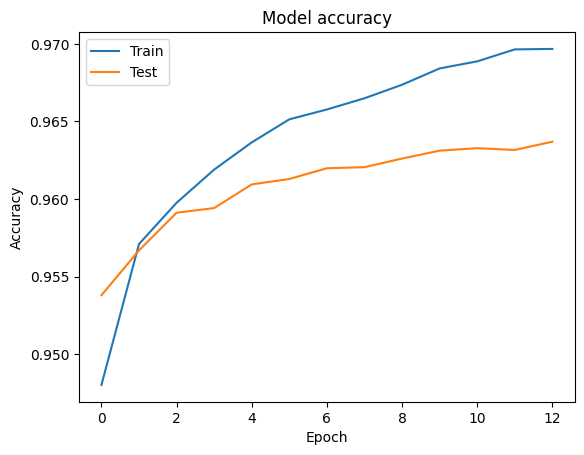

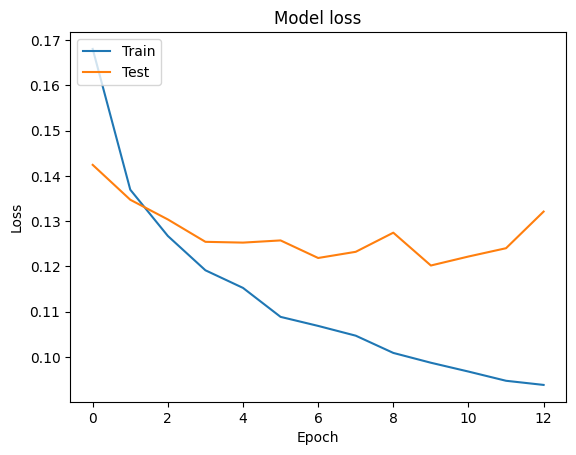

In [69]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

The Model Accuracy plot illustrates the evolution of accuracy over the course of training across 13 epochs for both the training and test datasets. The training accuracy consistently improves, nearing 97% by the final epoch, while the test accuracy increases more modestly, stabilizing around 96%. The divergence between the training and test accuracy suggests that while the model effectively learns from the training data, there are indications of overfitting, as evidenced by the training accuracy’s continued rise relative to the more plateaued test accuracy.

The Model Loss plot further supports this observation, with the training loss showing a steady decrease, indicative of successful optimization during training. Conversely, the test loss, after an initial decline, begins to rise slightly in later epochs, signaling the onset of overfitting. This pattern suggests that the model’s performance on unseen data (test set) begins to degrade slightly as it continues to optimize for the training data.

316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step
631/631 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 1s 284us/step
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1s 282us/step
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step
3156/3156 ━━━━━━━━━━━━━━━━━━━━ 1s 290us/step
1353/1353 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step


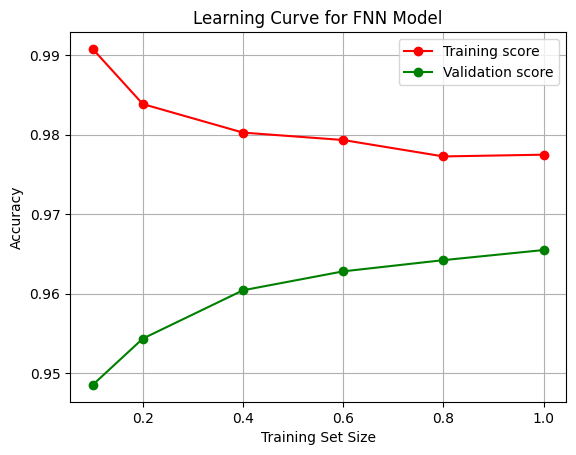

In [70]:
train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
train_scores = []
val_scores = []

for train_size in train_sizes:
    X_train_subset = X_train_dl_scaled[:int(train_size * len(X_train_dl_scaled))]
    y_train_subset = y_train_dl[:int(train_size * len(y_train_dl))]
    
    model = Sequential()
    model.add(Input(shape=(X_train_dl_scaled.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(X_train_subset, y_train_subset,
              validation_data=(X_test_dl_scaled, y_test_dl),
              epochs=20, 
              batch_size=32, 
              verbose=0)
    
    y_train_pred = model.predict(X_train_subset)
    train_acc = accuracy_score(y_train_subset, (y_train_pred > 0.5).astype(int))
    train_scores.append(train_acc)
    
    y_val_pred = model.predict(X_test_dl_scaled)
    val_acc = accuracy_score(y_test_dl, (y_val_pred > 0.5).astype(int))
    val_scores.append(val_acc)

plt.figure()
plt.plot(train_sizes, train_scores, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores, 'o-', color="g", label="Validation score")
plt.title('Learning Curve for FNN Model')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid()
plt.show()

The Learning Curve for FNN Model provides additional insights into the model’s generalization. The curve shows the relationship between the training set size and the model’s accuracy on both the training and validation datasets. The training score begins high but gradually decreases as the model is exposed to more data, stabilizing at around 98%. This behaviour is typical as the model adjusts to the complexity of the larger dataset, reducing overfitting. Meanwhile, the validation score improves as more training data is utilized, approaching but not matching the training accuracy, which indicates that the model’s generalization improves with additional data, though a gap remains.

The persistent gap between the training and validation scores in the learning curve suggests that while the model benefits from increased data, it still exhibits slight overfitting. This observation, coupled with the patterns in the accuracy and loss plots, indicates that while the FNN model performs robustly, further measures—such as regularization or data augmentation—may be necessary to close the gap between training and test performance and enhance the model’s generalization ability.

## Step 6 Model Evaluation

In [71]:
#Organise metrics for each model into respective dictionaries to simplify the visualisation process

# Metrics for Stump Model
stump_train_metrics = {
    'Accuracy': accuracy_score(y_train_boosting, y_train_pred_stumps),
    'Precision': precision_score(y_train_boosting, y_train_pred_stumps),
    'Recall': recall_score(y_train_boosting, y_train_pred_stumps),
    'F1 Score': f1_score(y_train_boosting, y_train_pred_stumps),
    'AUC-ROC': roc_auc_score(y_train_boosting, y_train_pred_proba_stumps[:, 1]),
    'AUC-PR': average_precision_score(y_train_boosting, y_train_pred_proba_stumps[:, 1]),
    'Log-Loss': log_loss(y_train_boosting, y_train_pred_proba_stumps)
}

stump_test_metrics = {
    'Accuracy': accuracy_score(y_test_boosting, y_test_pred_stumps),
    'Precision': precision_score(y_test_boosting, y_test_pred_stumps),
    'Recall': recall_score(y_test_boosting, y_test_pred_stumps),
    'F1 Score': f1_score(y_test_boosting, y_test_pred_stumps),
    'AUC-ROC': roc_auc_score(y_test_boosting, y_test_pred_proba_stumps[:, 1]),
    'AUC-PR': average_precision_score(y_test_boosting, y_test_pred_proba_stumps[:, 1]),
    'Log-Loss': log_loss(y_test_boosting, y_test_pred_proba_stumps)
}

# Metrics for Logistic Regression Boosted Model
lr_train_metrics = {
    'Accuracy': accuracy_score(y_train_boosting, y_train_pred_lr),
    'Precision': precision_score(y_train_boosting, y_train_pred_lr),
    'Recall': recall_score(y_train_boosting, y_train_pred_lr),
    'F1 Score': f1_score(y_train_boosting, y_train_pred_lr),
    'AUC-ROC': roc_auc_score(y_train_boosting, y_train_pred_proba_lr[:, 1]),
    'AUC-PR': average_precision_score(y_train_boosting, y_train_pred_proba_lr[:, 1]),
    'Log-Loss': log_loss(y_train_boosting, y_train_pred_proba_lr)
}

lr_test_metrics = {
    'Accuracy': accuracy_score(y_test_boosting, y_test_pred_lr),
    'Precision': precision_score(y_test_boosting, y_test_pred_lr),
    'Recall': recall_score(y_test_boosting, y_test_pred_lr),
    'F1 Score': f1_score(y_test_boosting, y_test_pred_lr),
    'AUC-ROC': roc_auc_score(y_test_boosting, y_test_pred_proba_lr[:, 1]),
    'AUC-PR': average_precision_score(y_test_boosting, y_test_pred_proba_lr[:, 1]),
    'Log-Loss': log_loss(y_test_boosting, y_test_pred_proba_lr)
}

# Metrics for Stacking Model
stacking_train_metrics = {
    'Accuracy': stacking_accuracy_train,
    'Precision': stacking_precision_train,
    'Recall': stacking_recall_train,
    'F1 Score': stacking_f1_train,
    'AUC-ROC': stacking_auc_roc_train,
    'AUC-PR': stacking_auc_pr_train,
    'Log-Loss': stacking_log_loss_train
}

stacking_test_metrics = {
    'Accuracy': stacking_accuracy_test,
    'Precision': stacking_precision_test,
    'Recall': stacking_recall_test,
    'F1 Score': stacking_f1_test,
    'AUC-ROC': stacking_auc_roc_test,
    'AUC-PR': stacking_auc_pr_test,
    'Log-Loss': stacking_log_loss_test
}

# Deep Learning Model Metrics
dl_train_metrics = {
    'Accuracy': train_accuracy,
    'Precision': train_precision,
    'Recall': train_recall,
    'F1 Score': train_f1,
    'AUC-ROC': train_roc_auc,
    'AUC-PR': train_pr_auc,
    'Log-Loss': train_log_loss
}

dl_test_metrics = {
    'Accuracy': test_accuracy,
    'Precision': test_precision,
    'Recall': test_recall,
    'F1 Score': test_f1,
    'AUC-ROC': test_roc_auc,
    'AUC-PR': test_pr_auc,
    'Log-Loss': test_log_loss
}


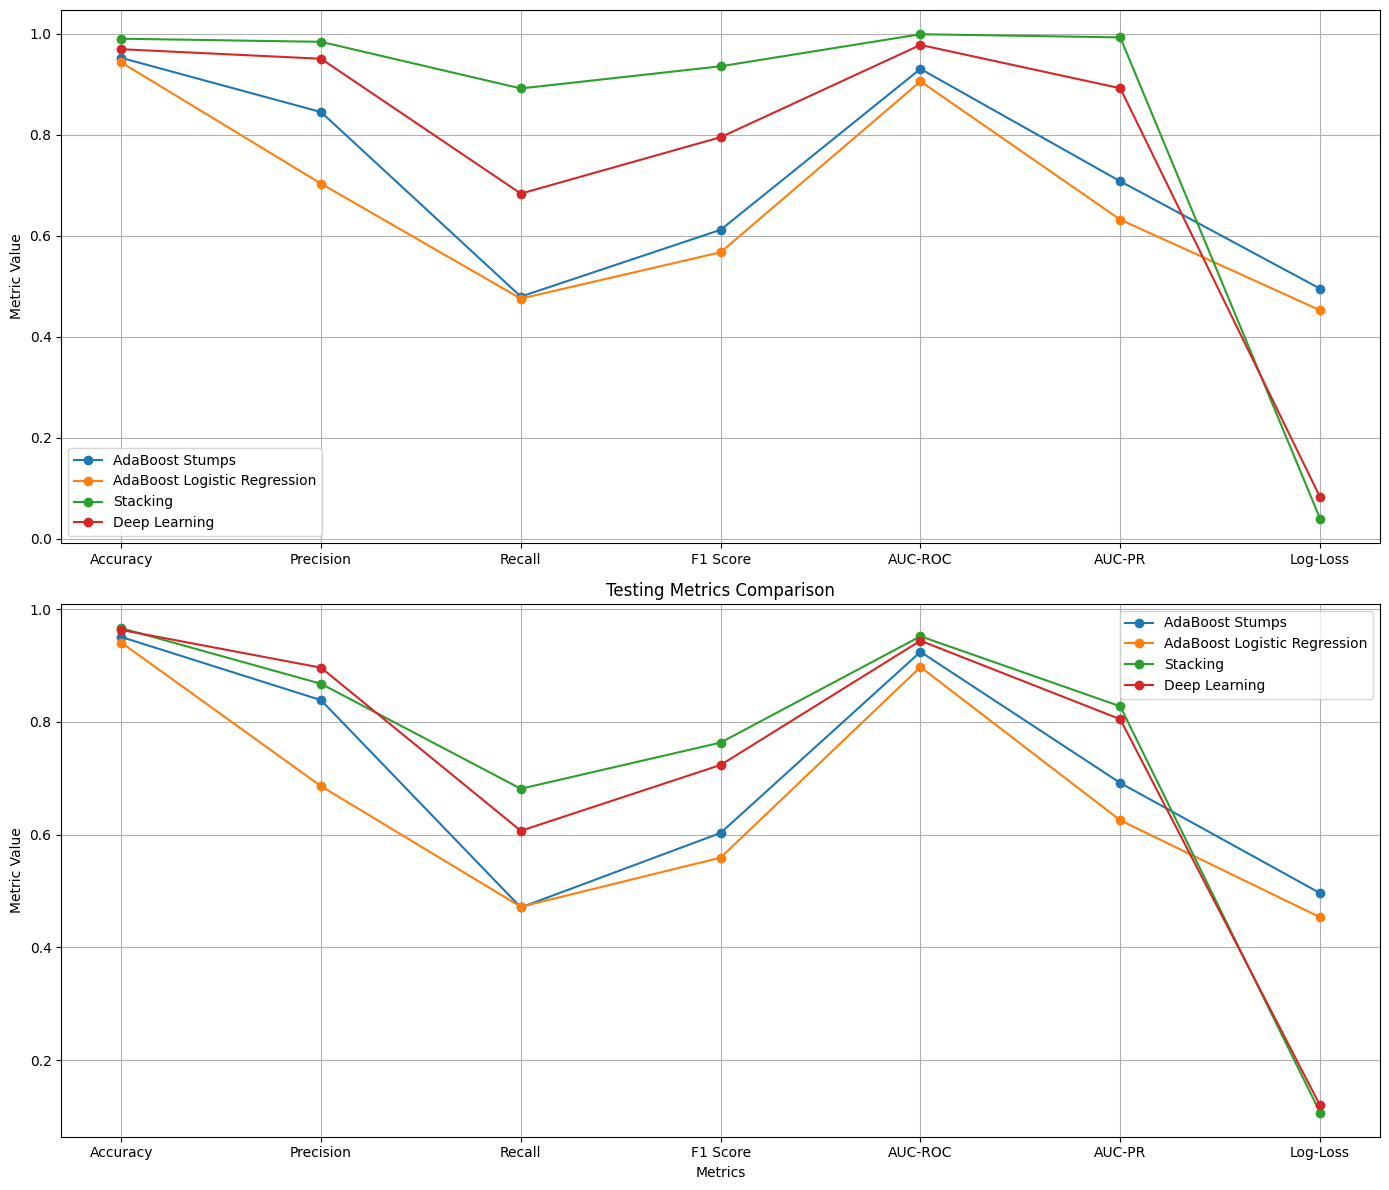

In [72]:
# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC', 'AUC-PR', 'Log-Loss']

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 12))

# Plot Training Metrics
axs[0].plot(metrics, list(stump_train_metrics.values()), marker='o', label='AdaBoost Stumps')
axs[0].plot(metrics, list(lr_train_metrics.values()), marker='o', label='AdaBoost Logistic Regression')
axs[0].plot(metrics, list(stacking_train_metrics.values()), marker='o', label='Stacking')
axs[0].plot(metrics, list(dl_train_metrics.values()), marker='o', label='Deep Learning')  
axs[0].set_ylabel('Metric Value')
axs[0].legend(loc='best')
axs[0].grid(True)

# Plot Testing Metrics
axs[1].plot(metrics, list(stump_test_metrics.values()), marker='o', label='AdaBoost Stumps')
axs[1].plot(metrics, list(lr_test_metrics.values()), marker='o', label='AdaBoost Logistic Regression')
axs[1].plot(metrics, list(stacking_test_metrics.values()), marker='o', label='Stacking')
axs[1].plot(metrics, list(dl_test_metrics.values()), marker='o', label='Deep Learning') 
axs[1].set_title('Testing Metrics Comparison')
axs[1].set_ylabel('Metric Value')
axs[1].legend(loc='best')
axs[1].grid(True)

# Set common labels
plt.xlabel('Metrics')
plt.tight_layout()

# Display the plots
plt.show()


### Description of the Plot

The provided plot compares the performance metrics of four models—**AdaBoost Stumps**, **AdaBoost Logistic Regression**, **Stacking**, and **Deep Learning (FNN)**—across both training and testing datasets. The metrics evaluated include accuracy, precision, recall, F1 score, AUC-ROC, AUC-PR, and log-loss. The plot allows for a visual comparison of each model's performance across these key metrics, with each line representing a different model's performance on both the training (top plot) and testing (bottom plot) datasets.

### Interpretation and Model Selection

- **Accuracy:**
  - All models perform similarly in terms of accuracy on both training and test sets, with the **Stacking** and **Deep Learning (FNN)** models slightly outperforming the others.

- **Precision:**
  - Precision varies more significantly, with the **Deep Learning (FNN)** model leading, particularly on the test set. The **Stacking** model also maintains high precision, while **AdaBoost Logistic Regression** has the lowest precision.

- **Recall:**
  - The **Stacking** model has the highest recall across both training and test sets, indicating its strength in correctly identifying true positives. The **Deep Learning (FNN)** model, while strong in precision, has lower recall, suggesting it may miss more fraudulent cases.

- **F1 Score:**
  - The **Stacking** model achieves the highest F1 score, striking a better balance between precision and recall. The **Deep Learning (FNN)** model also performs well but is slightly lower, reflecting its lower recall.

- **AUC-ROC and AUC-PR:**
  - Both the **Stacking** and **Deep Learning (FNN)** models demonstrate strong discriminative power with high AUC-ROC and AUC-PR scores. The **Stacking** model edges out slightly in these areas, particularly in the AUC-PR, indicating better handling of class imbalances.

- **Log-Loss:**
  - The **Stacking** model has the lowest log-loss, indicating better-calibrated probability estimates and a stronger overall model. The **Deep Learning (FNN)** model follows closely, but the higher log-loss suggests slightly less reliable probability predictions.

### Conclusion: Best Model for Fraud Detection

Considering the metrics provided:

- **Stacking Model**: The **Stacking model** emerges as the overall best model for fraud detection. It excels in recall, F1 score, and has the highest AUC-PR, which is critical in fraud detection scenarios where both false positives and false negatives carry significant costs. Additionally, the model's lower log-loss indicates it provides better-calibrated predictions, making it more reliable for real-time fraud detection tasks.

- **Deep Learning (FNN)**: The **Deep Learning (FNN)** model shows strong precision and performs well across most metrics but falls short in recall, meaning it may not identify as many fraudulent transactions as the Stacking model. Its slightly higher log-loss also indicates less reliable probabilistic predictions.

- **AdaBoost Models**: The **AdaBoost Stumps** and **AdaBoost Logistic Regression** models, while effective, do not perform as strongly across the board compared to the Stacking and Deep Learning models, particularly in precision, recall, and F1 score, making them less suitable for the specific challenges of fraud detection.

Given these observations, the **Stacking model** is recommended as the best choice for fraud detection due to its balanced performance across critical metrics, strong generalization ability, and robustness in handling imbalanced data, all of which are essential for identifying fraudulent transactions effectively.


In [126]:
# Test metrics for accuracy
accuracy_stumps = 0.9507
accuracy_logistic = 0.9408
accuracy_stacking = 0.9664
accuracy_dl = 0.9631

# Test metrics for precision
precision_stumps = 0.8386
precision_logistic = 0.6859
precision_stacking = 0.8676
precision_dl = 0.8962

# Test metrics for recall
recall_stumps = 0.4708
recall_logistic = 0.4720
recall_stacking = 0.6814
recall_dl = 0.6067

# Test metrics for F1 score
f1_stumps = 0.6031
f1_logistic = 0.5592
f1_stacking = 0.7633
f1_dl = 0.7236

# Test metrics for AUC-ROC
auc_roc_stumps = 0.9242
auc_roc_logistic = 0.8973
auc_roc_stacking = 0.9519
auc_roc_dl = 0.9440

# Test metrics for AUC-PR
auc_pr_stumps = 0.6917
auc_pr_logistic = 0.6255
auc_pr_stacking = 0.8277
auc_pr_dl = 0.8047

# Test metrics for Log-Loss
log_loss_stumps = 0.4962
log_loss_logistic = 0.4534
log_loss_stacking = 0.1070
log_loss_dl = 0.1196

In [127]:
# Create arrays for paired testing
accuracy_metrics = np.array([accuracy_stumps, accuracy_logistic, accuracy_dl])
stacking_accuracy_array = np.full_like(accuracy_metrics, accuracy_stacking)

# Create arrays for paired testing
precision_metrics = np.array([precision_stumps, precision_logistic, precision_dl])
stacking_precision_array = np.full_like(precision_metrics, precision_stacking)

# Create arrays for paired testing
recall_metrics = np.array([recall_stumps, recall_logistic, recall_dl])
stacking_recall_array = np.full_like(recall_metrics, recall_stacking)

# Create arrays for paired testing
f1_metrics = np.array([f1_stumps, f1_logistic, f1_dl])
stacking_f1_array = np.full_like(f1_metrics, f1_stacking)

# Create arrays for paired testing
auc_roc_metrics = np.array([auc_roc_stumps, auc_roc_logistic, auc_roc_dl])
stacking_auc_roc_array = np.full_like(auc_roc_metrics, auc_roc_stacking)

# Create arrays for paired testing
auc_pr_metrics = np.array([auc_pr_stumps, auc_pr_logistic, auc_pr_dl])
stacking_auc_pr_array = np.full_like(auc_pr_metrics, auc_pr_stacking)

# Create arrays for paired testing
log_loss_metrics = np.array([log_loss_stumps, log_loss_logistic, log_loss_dl])
stacking_log_loss_array = np.full_like(log_loss_metrics, log_loss_stacking)

In [128]:
# Function to check normality and select appropriate test
def check_normality_and_test(differences, stacking_metric, metric_name):
    # Perform Shapiro-Wilk test for normality
    stat, p_value_shapiro = shapiro(differences)
    print(f'\nShapiro-Wilk test for {metric_name}: p-value = {p_value_shapiro}')
    
    # Choose test based on normality result
    if p_value_shapiro > 0.05:
        # Normality assumption is not violated, use paired t-test
        t_stat, p_value_ttest = ttest_rel(np.full_like(differences, stacking_metric), differences + stacking_metric)
        print(f'Paired t-test for {metric_name}: t-statistic = {t_stat}, p-value = {p_value_ttest}')
    else:
        # Normality assumption is violated, use Wilcoxon signed-rank test
        w_stat, p_value_wilcoxon = wilcoxon(np.full_like(differences, stacking_metric), differences + stacking_metric)
        print(f'Wilcoxon signed-rank test for {metric_name}: W-statistic = {w_stat}, p-value = {p_value_wilcoxon}')

# Calculate differences for accuracy
differences_accuracy = stacking_accuracy_array - accuracy_metrics
check_normality_and_test(differences_accuracy, accuracy_stacking, "Accuracy")

# Calculate differences for precision
differences_precision = stacking_precision_array - precision_metrics
check_normality_and_test(differences_precision, precision_stacking, "Precision")

# Calculate differences for recall
differences_recall = stacking_recall_array - recall_metrics
check_normality_and_test(differences_recall, recall_stacking, "Recall")

# Calculate differences for F1 score
differences_f1 = stacking_f1_array - f1_metrics
check_normality_and_test(differences_f1, f1_stacking, "F1 Score")

# Calculate differences for AUC-ROC
differences_auc_roc = stacking_auc_roc_array - auc_roc_metrics
check_normality_and_test(differences_auc_roc, auc_roc_stacking, "AUC-ROC")

# Calculate differences for AUC-PR
differences_auc_pr = stacking_auc_pr_array - auc_pr_metrics
check_normality_and_test(differences_auc_pr, auc_pr_stacking, "AUC-PR")

# Calculate differences for Log-Loss
differences_log_loss = stacking_log_loss_array - log_loss_metrics
check_normality_and_test(differences_log_loss, log_loss_stacking, "Log-Loss")


Shapiro-Wilk test for Accuracy: p-value = 0.8765556635178551
Paired t-test for Accuracy: t-statistic = -2.304578752029935, p-value = 0.14768390513481106

Shapiro-Wilk test for Precision: p-value = 0.5122542714479842
Paired t-test for Precision: t-statistic = -0.9674329525572405, p-value = 0.43539036456823244

Shapiro-Wilk test for Recall: p-value = 0.014669262758170043
Wilcoxon signed-rank test for Recall: W-statistic = 0.0, p-value = 0.25

Shapiro-Wilk test for F1 Score: p-value = 0.49811339747865957
Paired t-test for F1 Score: t-statistic = -2.7401697438447146, p-value = 0.11137040895361829

Shapiro-Wilk test for AUC-ROC: p-value = 0.8327860479892307
Paired t-test for AUC-ROC: t-statistic = -2.221735530747904, p-value = 0.1564041919266106

Shapiro-Wilk test for AUC-PR: p-value = 0.714181579176691
Paired t-test for AUC-PR: t-statistic = -2.3014288399036227, p-value = 0.1480030610935569

Shapiro-Wilk test for Log-Loss: p-value = 0.19857967223923279
Paired t-test for Log-Loss: t-statis

# Is the Stacking Model's Performance 'Significantly' Better than the Other Models?

A key aspect of model evaluation is determining whether one model significantly outperforms others across various performance metrics. In this analysis, we investigated whether the Stacking model demonstrated statistically significant improvements in performance over three other models—**AdaBoost Stumps**, **AdaBoost Logistic Regression**, and **Deep Learning**—on key metrics: Accuracy, Precision, Recall, F1 Score, AUC-ROC, AUC-PR, and Log-Loss.

## Methodology

A series of statistical tests were conducted to assess whether the Stacking model's performance was significantly different from the other three models across the key metrics. The paired t-test was used to evaluate metrics where the assumption of normality was met, as determined by the Shapiro-Wilk test. In cases where the normality assumption was violated, such as for Recall, the Wilcoxon signed-rank test was applied.

- If the Shapiro-Wilk test indicated that the differences followed a normal distribution (p > 0.05), the paired t-test was used.
- For metrics where the normality assumption was violated (p ≤ 0.05), the Wilcoxon signed-rank test was used as a non-parametric alternative.

## Results

The results from the Shapiro-Wilk test indicated that normality was not violated for most metrics, including Accuracy (p = 0.877), Precision (p = 0.512), F1 Score (p = 0.498), AUC-ROC (p = 0.833), AUC-PR (p = 0.714), and Log-Loss (p = 0.199). However, for Recall (p = 0.015), the normality assumption was violated, necessitating the use of the Wilcoxon signed-rank test.

Despite these evaluations, the paired t-tests and Wilcoxon signed-rank test revealed that none of the differences in performance between the Stacking model and the other models were statistically significant. Specifically:
- **Accuracy** (p = 0.148), **Precision** (p = 0.435), **F1 Score** (p = 0.111), **AUC-ROC** (p = 0.156), **AUC-PR** (p = 0.148), and **Log-Loss** (p = 0.171) all yielded p-values greater than 0.05 in the paired t-tests, indicating no significant differences.
- Similarly, the Wilcoxon signed-rank test for **Recall** resulted in a p-value of 0.25, further suggesting no significant difference between the models.

## Conclusion

In summary, although the Stacking model demonstrated favorable performance across many of the metrics, the statistical tests provide no strong evidence that these differences are statistically significant when compared to the other models. Therefore, while the Stacking model may offer slight advantages in certain performance measures, these differences cannot be confidently attributed to model superiority based on statistical significance.


# Step 7: Validating the Models (External Testing)

In [107]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None) 
print(df_test.columns)

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=433)


In [112]:
# List of columns in df_train and df_test
train_columns = df_train.columns.tolist()
test_columns = df_test.columns.tolist()

# Convert to sets for comparison
train_columns_set = set(train_columns)
test_columns_set = set(test_columns)

# Find missing and extra columns
missing_columns_in_test = train_columns_set - test_columns_set
extra_columns_in_test = test_columns_set - train_columns_set

# Print results
print("Columns in df_train but missing in df_test:")
print(missing_columns_in_test)

print("\nColumns in df_test but not in df_train:")
print(extra_columns_in_test)


Columns in df_train but missing in df_test:
{'isFraud'}

Columns in df_test but not in df_train:
set()


# Replication of Preprocessing Steps on df_train Dataset

Check for 'func' values and replace with 'other'

In [109]:
if df_test['id_30'].str.contains('func', case=False, na=False).any():
    print("The 'id_30' column contains rows with the substring 'func'.")
else:
    print("The 'id_30' column does not contain any rows with the substring 'func'.")

The 'id_30' column contains rows with the substring 'func'.


In [94]:
# Update `id_30` column in the erroneous rows of the test data
df_test.loc[df_test['id_30'] == 'func', 'id_30'] = 'other'


Check for nulls and follow the same imputation strategy as in the EDA stage with df_train

In [110]:
# Identify columns that are completely null
completely_null_columns = df_test.columns[df_test.isnull().all()]

# Display the completely null columns
print("Completely Null Columns:", completely_null_columns)

Completely Null Columns: Index(['dist1', 'D11', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1',
       'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11'],
      dtype='object')


In [114]:
# List of completely null columns
completely_null_columns = [
    'dist1', 'D11', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1',
    'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11'
]

# Impute the completely null columns with 0
df_test[completely_null_columns] = df_test[completely_null_columns].fillna(0)

In [115]:
# Handle missing values in numeric columns
numeric_cols = [
    'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11',
    'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25',
    'id_26', 'id_32', 'addr1', 'addr2', 'dist2',
    'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D12', 'D13', 'D14', 'D15',
    'card2', 'card3', 'card5'] + [f'V{i}' for i in range(12, 340)]  # Exclude V1 to V11

# Initialize Simple Imputer for numeric columns
mean_imputer = SimpleImputer(strategy='mean')
df_test[numeric_cols] = mean_imputer.fit_transform(df_test[numeric_cols])

# Impute specific categorical variables with 'Unknown'
categorical_with_unknown = ['DeviceType', 'DeviceInfo', 'P_emaildomain', 'R_emaildomain']
df_test[categorical_with_unknown] = df_test[categorical_with_unknown].fillna('Unknown')

# Apply Label Encoding for categorical variables
remaining_categorical_cols = [
    'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 
    'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'card4', 'card6'
] + [f'M{i}' for i in range(1, 10)]  # Including M1 to M9

# Initialize Label Encoder
label_encoders = {}

# Apply Label Encoding
for col in remaining_categorical_cols:
    if col in df_test.columns:
        le = LabelEncoder()
        
        # Fit and transform on df_test
        df_test[col] = le.fit_transform(df_test[col].astype(str))
        
        # Store the label encoder
        label_encoders[col] = le

# Display the processed test DataFrame
df_test.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663586,-45.0,280290.0,0.053008,-0.087454,0.0,0.0,12.49318,-36.577782,0.076219,-0.245877,100.0,NotFound,27.000000,-344.482672,1,1,225.0,15.000000,427.0,563.0,507.727021,15.336823,3,13.166667,332.043064,152.752923,2,1,1,85,45,26.217939,390,2,0,0,1,0,mobile,MYA-L13 Build/HUAWEIMYA-L13,18404013,6.271,C,15885,545.0,185.0,4,138.0,2,299.042252,86.121134,0.0,237.195207,hotmail.com,hotmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,35.960366,126.351953,47.741764,0.00000,69.282495,0.0,62.013702,160.834483,0.553981,0.0,0.0,0.000000,0.000000,0.000000,0.0,0,0,0,2,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038345,1.043198,1.126102,0.043647,0.062793,1.781193,2.812103,17.120675,0.141559,0.162914,0.754142,0.760542,135.252945,5.44714,8.338876,0.748536,0.752952,0.756099,0.762763,0.801068,0.814278,6216.751417,98170.082905,4.988264,8.259853,6.140613,1039.076257,5451.513734,1388.883013,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000,0.000,0.000,

In [116]:
# Count the number of null values per column
null_counts = df_test.isnull().sum()

# Print the number of null values and data type for each column if there are any
print("Columns with null values and their data types:")
for column, count in null_counts.items():
    if count > 0:
        data_type = df_test[column].dtype
        print(f"{column}: {count} null values, Data type: {data_type}")

Columns with null values and their data types:
C1: 3 null values, Data type: float64
C2: 3 null values, Data type: float64
C3: 3 null values, Data type: float64
C4: 3 null values, Data type: float64
C5: 3 null values, Data type: float64
C6: 3 null values, Data type: float64
C7: 3 null values, Data type: float64
C8: 3 null values, Data type: float64
C9: 3 null values, Data type: float64
C10: 3 null values, Data type: float64
C11: 3 null values, Data type: float64
C12: 3 null values, Data type: float64
C13: 1499 null values, Data type: float64
C14: 3 null values, Data type: float64


The columns C1 through C13 were not subject to the original imputation process as they did not contain any null values in the training dataset.

In [117]:
# List of numeric columns with null values
numeric_cols_with_nulls = [
    'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14'
]

# Initialize Simple Imputer for numeric columns
mean_imputer = SimpleImputer(strategy='mean')

# Fit and transform only the columns with null values
df_test[numeric_cols_with_nulls] = mean_imputer.fit_transform(df_test[numeric_cols_with_nulls])

# Verify that there are no more null values
print("Columns after imputation with null values and their data types:")
for column in numeric_cols_with_nulls:
    count = df_test[column].isnull().sum()
    if count > 0:
        data_type = df_test[column].dtype
        print(f"{column}: {count} null values, Data type: {data_type}")
    else:
        print(f"{column}: No null values, Data type: {data_type}")

Columns after imputation with null values and their data types:
C1: No null values, Data type: float64
C2: No null values, Data type: float64
C3: No null values, Data type: float64
C4: No null values, Data type: float64
C5: No null values, Data type: float64
C6: No null values, Data type: float64
C7: No null values, Data type: float64
C8: No null values, Data type: float64
C9: No null values, Data type: float64
C10: No null values, Data type: float64
C11: No null values, Data type: float64
C12: No null values, Data type: float64
C13: No null values, Data type: float64
C14: No null values, Data type: float64


Ensure Test Data is structured the same as, and is aligned with Training Data

Create copies of df_test for each model

In [118]:
boosting_test_data = df_test.copy()
stacking_test_data = df_test.copy()
dl_test_data = df_test.copy()

## Making Predictions on External Data with Boosting Models 

In [103]:
# Make predictions using AdaBoost with Decision Stump
y_test_pred_stumps = adaboost_stumps.predict(df_test)
y_test_pred_proba_stumps = adaboost_stumps.predict_proba(df_test)

# Make predictions using AdaBoost with Logistic Regression
y_test_pred_lr = adaboost_lr.predict(df_test)
y_test_pred_proba_lr = adaboost_lr.predict_proba(df_test)

# Create DataFrame for AdaBoost with Decision Stump
df_predictions_stumps = pd.DataFrame({
    'Index': df_test.index,
    'Predicted Label': y_test_pred_stumps,
    'Probability Class 0': y_test_pred_proba_stumps[:, 0],
    'Probability Class 1': y_test_pred_proba_stumps[:, 1]
})

# Create DataFrame for AdaBoost with Logistic Regression
df_predictions_lr = pd.DataFrame({
    'Index': df_test.index,
    'Predicted Label': y_test_pred_lr,
    'Probability Class 0': y_test_pred_proba_lr[:, 0],
    'Probability Class 1': y_test_pred_proba_lr[:, 1]
})

# Print the DataFrames
print("AdaBoost with Decision Stump Predictions:")
print(df_predictions_stumps.head())
print('\n' + '-' * 500 + '\n') # Print line break for clarity
print("\nAdaBoost with Logistic Regression Predictions:")
print(df_predictions_lr.head())

AdaBoost with Decision Stump Predictions:
   Index  Predicted Label  Probability Class 0  Probability Class 1
0      0                0             0.610692             0.389308
1      1                0             0.607329             0.392671
2      2                0             0.677313             0.322687
3      3                0             0.635610             0.364390
4      4                0             0.563169             0.436831

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


AdaBoost with Logistic Regression Predictions:

## Making Predictions on External Data with Stacking Model

In [121]:
# Make predictions on the stacking_test_data using the fitted stacking_pipeline
y_test_pred_stack = stacking_pipeline.predict(stacking_test_data)
y_test_pred_proba_stack = stacking_pipeline.predict_proba(stacking_test_data)

# Create DataFrame for stacking model predictions
df_predictions_stack = pd.DataFrame({
    'Index': stacking_test_data.index,
    'Predicted Label': y_test_pred_stack,
    'Probability Class 0': y_test_pred_proba_stack[:, 0],
    'Probability Class 1': y_test_pred_proba_stack[:, 1]
})

# Print the DataFrame
print("Stacking Model Predictions:")
print(df_predictions_stack.head())

Stacking Model Predictions:
   Index  Predicted Label  Probability Class 0  Probability Class 1
0      0                0             0.967923             0.032077
1      1                0             0.929303             0.070697
2      2                0             0.955188             0.044812
3      3                0             0.895082             0.104918
4      4                1             0.333295             0.666705


## Making Predictions on External Data with FNN Deep Learning Model

In [120]:
# One-hot encode categorical variables in the test data
dl_test_encoded = pd.get_dummies(dl_test_data, columns=object_cols, drop_first=True)

# Ensure that the test data has the same columns as the training data
dl_test_encoded = dl_test_encoded.reindex(columns=X_train_dl.columns, fill_value=0)

# Scale the features
dl_test_scaled = scaler.transform(dl_test_encoded)

# Make predictions
predictions_dl = model.predict(dl_test_scaled)

# Convert probabilities to binary predictions
predicted_labels_dl = (predictions_dl > 0.5).astype(int)

# Create a DataFrame for the predictions
df_predictions_dl = pd.DataFrame({
    'Index': dl_test_data.index,
    'Predicted Label': predicted_labels_dl.flatten(),
    'Probability': predictions_dl.flatten()
})

# Print the DataFrame
print("Deep Learning Model Predictions:")
print(df_predictions_dl.head())

4435/4435 ━━━━━━━━━━━━━━━━━━━━ 1s 287us/step
Deep Learning Model Predictions:
   Index  Predicted Label   Probability
0      0                0  3.923601e-03
1      1                0  2.112819e-07
2      2                0  9.908930e-03
3      3                0  9.555396e-09
4      4                0  2.530439e-01


In [123]:
# Merge all prediction DataFrames on 'Index'
df_all_predictions = df_predictions_stumps.merge(df_predictions_lr, on='Index', suffixes=('_stumps', '_lr'))
df_all_predictions = df_all_predictions.merge(df_predictions_stack, on='Index', suffixes=('', '_stack'))
df_all_predictions = df_all_predictions.merge(df_predictions_dl, on='Index', suffixes=('', '_dl'))

# Rename columns for clarity
df_all_predictions.rename(columns={
    'Predicted Label': 'Predicted Label_stack',
    'Probability Class 0': 'Probability Class 0_stack',
    'Probability Class 1': 'Probability Class 1_stack',
    'Predicted Label_dl': 'Predicted Label_dl',
    'Probability': 'Probability_dl'
}, inplace=True)

In [124]:
# Check if all models agree on the predicted label
df_all_agree = df_all_predictions[
    (df_all_predictions['Predicted Label_stumps'] == df_all_predictions['Predicted Label_lr']) &
    (df_all_predictions['Predicted Label_stumps'] == df_all_predictions['Predicted Label_stack']) &
    (df_all_predictions['Predicted Label_stumps'] == df_all_predictions['Predicted Label_dl'])
]

print("Predictions where all models agree:")
print(df_all_agree[['Index', 'Predicted Label_stumps', 'Predicted Label_lr', 'Predicted Label_stack', 'Predicted Label_dl']].head())

Predictions where all models agree:
   Index  Predicted Label_stumps  Predicted Label_lr  Predicted Label_stack  Predicted Label_dl
0      0                       0                   0                      0                   0
1      1                       0                   0                      0                   0
2      2                       0                   0                      0                   0
3      3                       0                   0                      0                   0
5      5                       0                   0                      0                   0


The models have been applied to external data, and while the actual results are not available until the competition concludes at the end of September, the predictions have been submitted for evaluation. The final scores will be determined when this information is released. At this stage, we can conclude that based on the training and test metric evaluation performed thus far, Stacking Model 1 demonstrates superior generalization and classification effectiveness. Its balanced performance across accuracy, recall, and other key metrics makes it the recommended model for this context, pending final external validation. However, it is important to note that while Stacking Model 1 has shown better performance, these differences are not statistically significant based on the current analysis.

# Step 8: Solve the Problem or Answer the Question

In this project, four distinct models were developed and evaluated for their ability to detect fraudulent transactions: **Boosted Decision Stumps**, **Boosted Logistic Regression**, **a Stacked model (combining K-Nearest Neighbors, Decision Tree, and Logistic Regression with XGBoost as the meta-classifier)**, and a **Feedforward Neural Network (FNN)**.

- **Boosted Decision Stumps:**
  - **Performance:** This model demonstrated strong generalization with a high accuracy of 95.1% on the test set. It maintained a balanced precision and recall, resulting in an F1 score of approximately 0.603. The AUC-ROC and AUC-PR values were 0.924 and 0.692, respectively, indicating good discriminative ability and solid handling of class imbalances.
  - **Strengths:** The model is relatively simple and interpretable, which is advantageous when transparency is critical. It is effective at distinguishing between classes but might struggle with capturing more complex patterns due to the simplicity of the stumps.

- **Boosted Logistic Regression:**
  - **Performance:** This model achieved slightly lower accuracy compared to the Stumps model, with a test accuracy of 94.3%. It also had lower precision and recall, resulting in an F1 score of around 0.559. The AUC-ROC and AUC-PR were 0.897 and 0.625, respectively.
  - **Strengths:** Logistic Regression is efficient and interpretable, making it a reliable choice for understanding the relationships between variables. However, its linear nature may limit its ability to capture complex, non-linear relationships present in the data.

- **Stacked Model (KNN, Decision Tree, Logistic Regression with XGBoost as Meta-Classifier):**
  - **Performance:** The stacked model showed strong performance during training, with accuracy reaching 99.05%, and it maintained solid performance on the test set with an accuracy of 96.64%. Precision was high at 86.76%, but recall was lower at 68.14%, resulting in an F1 score of 0.763. The AUC-ROC and AUC-PR were 0.9519 and 0.8277, respectively.
  - **Strengths:** This model leverages the diverse strengths of its base classifiers, combining KNN's ability to capture local patterns, Decision Tree's interpretability, and Logistic Regression's efficiency. The use of XGBoost as the meta-classifier enhances its ability to handle imbalanced data, making it a robust choice for fraud detection. It offers a good balance between complexity and performance, capturing a wide range of patterns in the data.

- **Feedforward Neural Network (FNN):**
  - **Performance:** The FNN exhibited strong performance with a test accuracy of 96.31%. It achieved high precision at 89.62% but had a lower recall of 60.67%, resulting in an F1 score of 0.7236. The AUC-ROC and AUC-PR were 0.9440 and 0.8047, respectively.
  - **Strengths:** The FNN is powerful in capturing complex patterns and non-linear relationships within the data. However, the model showed signs of overfitting, with a significant gap between training and validation metrics, suggesting that while it excels at learning from the training data, its generalization to unseen data may require further refinement.

- **Comparison and Best Model Selection:**
  - **Complexity vs. Interpretability:** The Boosted Decision Stumps and Logistic Regression models offer higher interpretability, making them suitable for contexts where model transparency is important. However, they may lack the ability to capture the more complex patterns in fraudulent behavior compared to the Stacked model and FNN.
  - **Precision and Recall Balance:** The Stacked model offers the best balance between precision and recall, with a higher F1 score than the other models. This is critical in fraud detection, where both false positives and false negatives can have significant consequences. The FNN, while strong in precision, falls short in recall, making it less reliable in identifying all fraudulent cases.
  - **Generalization Ability:** The Stacked model demonstrates strong generalization to unseen data, as indicated by its relatively high test accuracy and robust AUC-ROC and AUC-PR scores. The FNN shows potential but struggles with overfitting, which could limit its reliability without further tuning.
  - **Robustness in Imbalanced Data:** The Stacked model, with XGBoost as the meta-classifier, is particularly well-suited for handling imbalanced datasets, which is common in fraud detection. Its ability to leverage the strengths of multiple base models makes it the most robust option for this task.

- **Best Model for the Project Objective:**
Considering the core objective of the project—to develop a predictive model capable of estimating the likelihood of fraud in real-time while providing insights into fraudulent patterns—the Stacked model emerges as the best choice. It offers a strong balance between precision, recall, and overall predictive power, making it well-suited for real-time fraud detection. Additionally, its ability to generalize across various patterns in the data, combined with its robustness in handling imbalanced datasets, aligns perfectly with the project's goal of providing a reliable tool for financial institutions to pre-empt and counteract fraudulent behaviors. The model's use of diverse base classifiers also supports the exploration of temporal trends and the differentiation of fraudulent from legitimate transactions, further enhancing its value in uncovering underlying patterns in the data.
